# 1. Business Understanding

## Introduction
This project seeks to analyze Airbnb listings in Nairobi City, Kenya, with the goal of uncovering the key determinants of **price** and **occupancy performance**. To achieve this, the project focuses on two predictive models:
- A **price prediction model** to estimate the optimal nightly rates of Airbnb listings.
- An **occupancy prediction model** to understand and forecast booking performance.

By leveraging structured data and predictive modeling, the analysis provides a comprehensive understanding of the factors influencing Airbnb performance in Nairobi.

---

## Business Understanding
The central research question guiding this project is:

**“What are the key determinants of pricing and occupancy in Airbnb listings in Nairobi?”**

The motivation behind this study stems from the growing popularity of Airbnb as a profitable investment in Kenya (Riungu, Kamwea, Imbaya, Akunja, & Kiama, 2025). As more investors and hosts enter the market, data-driven insights are increasingly essential for making informed business decisions.

This project is particularly relevant to the **real estate and hospitality sectors**. Its target audience includes:
- **Airbnb hosts and property investors** – who will gain insights into pricing strategies, occupancy drivers, and market competitiveness.
- **Policy makers and market analysts** – who can use the findings to understand trends in the short-term rental economy.

The models developed in this project serve as **decision-support tools** for optimizing Airbnb operations:
- The **price prediction model** helps hosts align their rates with property features and market conditions.
- The **occupancy prediction model** identifies factors influencing booking performance, supporting better forecasting and listing management.

By combining statistical modeling with machine learning techniques, this analysis aims to provide a data-informed foundation for improving Airbnb performance and investment decisions in Nairobi.


# 2. Data Understanding 

## 2.1 Import Libraries 

In [1]:
# ====== Data Handling ======
import pandas as pd
import numpy as np
import ast
from collections import Counter
import calendar

# ====== Visualization ======
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import contextily as ctx

# ====== Preprocessing ======
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PowerTransformer, QuantileTransformer

# ====== Regression & Tree Models ======
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from scipy.stats import randint, uniform

# ====== Clustering ======
from sklearn.cluster import KMeans

# ====== Correlation & Statistics ======
from scipy.stats import pearsonr, spearmanr
from scipy.stats import skew, kurtosis

# ====== NLP ======
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bertopic import BERTopic

# ====== Geospatial ======
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from shapely.geometry import Point
from branca.element import Template, MacroElement, Element


# ====== Utilities ======
import warnings
warnings.filterwarnings("ignore")
import joblib
from joblib import dump
import pickle
import textwrap

# =================================================
from scipy.stats import randint, uniform

# ================Deployment==============
import streamlit as st

c:\Users\mauka\.conda\envs\myenv\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## 2.2. Loading the Datasets

In [2]:
future_calendar = pd.read_csv("data/future_calendar_rates.csv")
listings_data = pd.read_csv("data/listings_data.csv")
past_calendar = pd.read_csv("data/past_calendar_rates.csv")
reviews = pd.read_csv("data/reviews_data.csv")

## 2.3. Dataset Examination
### 2.3.1 Checking the datasets columns and shape

In [3]:
datasets = {
    "future_calendar": future_calendar,
    "listings_data": listings_data,
    "past_calendar": past_calendar,
    "reviews": reviews
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.to_list())
    
    


future_calendar:
Shape: (3480, 14)
Columns: ['listing_id', 'date', 'vacant_days', 'reserved_days', 'occupancy', 'revenue', 'rate_avg', 'booked_rate_avg', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'native_booked_rate_avg', 'native_rate_avg', 'native_revenue']

listings_data:
Shape: (300, 61)
Columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_r

### 2.3.2 Displaying the last 5 rows of each dataset

In [4]:
print("future_calendar")
future_calendar.tail()

future_calendar


listing_id        date  vacant_days  reserved_days  occupancy  revenue  \
3475     3956790  01/03/2026           31              0      0.000        0   
3476     3956790  01/05/2026           31              0      0.000        0   
3477    11976359  01/03/2026           31              0      0.000        0   
3478     3956790  01/10/2025           14             17      0.548      497   
3479     3956790  01/09/2025           19             11      0.367      321   

      rate_avg  booked_rate_avg  booking_lead_time_avg  length_of_stay_avg  \
3475      30.6              NaN                    NaN                 NaN   
3476      31.2              NaN                    NaN                 NaN   
3477      21.9              NaN                    NaN                 NaN   
3478      29.5             29.2                   45.0                 4.0   
3479      28.2             29.2                   46.0                10.0   

      min_nights_avg  native_booked_rate_avg  native_rate_avg  native_revenue  
3475             2.0                     NaN             3954               0  
3476             2.0                     NaN             4031               0  
3477             1.0                     NaN             2830               0  
3478             2.0                  3773.0             3812           64214  
3479             2.0                  3773.0             3644           41474

In [5]:
print("listings_data")
listings_data.tail()

listings_data


listing_id                                       listing_name  \
295    41725548                 Aoukings Place Home Away from Home   
296    41759384    Furnished & serviced 2 bed behind Junction Mall   
297    41817931               One bedroom apartment in  kileleshwa   
298    41818959                        Studio apartment in kileưwa   
299    41825730  A comfortable and classy property in a leafy area   

           listing_type    room_type  \
295  Entire rental unit  entire_home   
296  Entire rental unit  entire_home   
297  Entire rental unit  entire_home   
298  Entire rental unit  entire_home   
299   Entire guesthouse  entire_home   

                                       cover_photo_url  photos_count  \
295  https://a0.muscache.com/im/pictures/airflow/Ho...            27   
296  https://a0.muscache.com/im/pictures/82937564-7...            19   
297  https://a0.muscache.com/im/pictures/hosting/Ho...            35   
298  https://a0.muscache.com/im/pictures/d7ffacd4-e...            40   
299  https://a0.muscache.com/im/pictures/70af2d79-1...            10   

       host_id    host_name cohost_ids cohost_names  ...  l90d_occupancy  \
295  135314917  Aouki Padox        NaN          NaN  ...           0.289   
296  190480480       Wandia        NaN          NaN  ...           0.000   
297  308523342      Damaris  433517328        Nelly  ...           0.000   
298  308523342      Damaris  433517328        Nelly  ...           0.000   
299  330570443         Jane        NaN          NaN  ...           0.000   

     l90d_adjusted_occupancy  l90d_revpar  l90d_revpar_native  \
295                    0.382          6.3               815.4   
296                    0.000          0.0                 0.0   
297                    0.000          0.0                 0.0   
298                    0.000          0.0                 0.0   
299                    0.000          0.0                 0.0   

     l90d_adjusted_revpar  l90d_adjusted_revpar_native  l90d_reserved_days  \
295                   8.4                       1079.2                  26   
296                   0.0                          0.0                   0   
297                   0.0                          0.0                   0   
298                   0.0                          0.0                   0   
299                   0.0                          0.0                   0   

    l90d_blocked_days l90d_available_days l90d_total_days  
295                22                  64              90  
296                 0                  90              90  
297                30                  90              90  
298                27                  90              90  
299                 0                  90              90  

[5 rows x 61 columns]

In [6]:
print("past_calendar")
past_calendar.tail()

past_calendar


listing_id        date  vacant_days  reserved_days  occupancy  revenue  \
3537    34539707  01/11/2024           15             15      0.500      257   
3538    34539707  01/01/2025            6             25      0.806      367   
3539    34539707  01/04/2025           21              9      0.300      144   
3540    34539707  01/06/2025           22              8      0.267      131   
3541    34539707  01/09/2024           21              9      0.300      158   

      rate_avg  booked_rate_avg  booking_lead_time_avg  length_of_stay_avg  \
3537      16.7             17.1                    2.0                15.0   
3538      14.5             14.7                   10.0                 6.0   
3539      15.0             16.0                   10.0                 4.0   
3540      15.8             16.4                    5.0                 8.0   
3541      17.4             17.6                   29.0                 4.0   

      min_nights_avg  native_booked_rate_avg  native_rate_avg  native_revenue  
3537             NaN                  2206.0             2154           33153  
3538             2.0                  1899.0             1873           47405  
3539             2.0                  2072.0             1943           18648  
3540             2.0                  2119.0             2041           16926  
3541             NaN                  2274.0             2248           20410

In [7]:
print("reviews")
reviews.tail()

reviews


listing_id        date  num_reviews                          reviewers
992    38693256  01/02/2025            2             40,107,990,118,239,300
993    38693256  01/04/2025            3  4,791,628,773,071,280,000,000,000
994    13453034  01/03/2025            1                           12933466
995    13453034  01/12/2024            1                           21443423
996    39290226  01/10/2024            2            135,349,052,277,424,000

### 2.3.3 Data types, Summary Statistics, Missing & Unique Values for the datasets

In [8]:
# Function to check the data type, summary statistics, missing and unique values
def datatypes_summary(df):
    dtypes_summary = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes,
        'Non-null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum(),
        'Unique Values': df.nunique().values,
        'Missing %': (df.isnull().sum()/len(df)*100).round(2).values,
        #'Most Common Data Type': df.dtypes.value_counts().idxmax()
    })
    
    # Describe stats (numerical + categorical + datetime)
    stats = df.describe(include='all').transpose()
    stats = stats.reset_index().rename(columns={'index': 'Column'})
    
    #picking trimmed subset of describe stats
    keep_cols = ['Column', 'mean', 'std', 'min', '25%', '50%', 'max', 'top', 'freq']
    stats = stats[[c for c in keep_cols if c in stats.columns]]
    
    # merge summaries
    merged = pd.merge(dtypes_summary, stats, on="Column", how="left")
    
    return merged



In [9]:
# ========================================
# Check data type per data set
# =========================================

print("🔹Future Calendar Data Types:")
display(datatypes_summary(future_calendar))

print("\n 🔹 Listings Data Types")
display(datatypes_summary(listings_data))

print("\n 🔹 Past Calender Data Types:")
display(datatypes_summary(past_calendar))

print("\n 🔹 Reviews Data Types")
display(datatypes_summary(reviews))

🔹Future Calendar Data Types:


Column Data Type  Non-null Count  Null Count  \
0               listing_id     int64            3480           0   
1                     date    object            3480           0   
2              vacant_days     int64            3480           0   
3            reserved_days     int64            3480           0   
4                occupancy   float64            3480           0   
5                  revenue     int64            3480           0   
6                 rate_avg   float64            3480           0   
7          booked_rate_avg   float64             389        3091   
8    booking_lead_time_avg   float64             243        3237   
9       length_of_stay_avg   float64             243        3237   
10          min_nights_avg   float64            3283         197   
11  native_booked_rate_avg   float64             389        3091   
12         native_rate_avg     int64            3480           0   
13          native_revenue     int64            3480           0   

    Unique Values  Missing %             mean              std       min  \
0             290       0.00  27742328.955172  11666504.832148  471581.0   
1              12       0.00              NaN              NaN       NaN   
2              31       0.00        28.672414         6.310099       0.0   
3              30       0.00         1.744253         6.241024       0.0   
4              59       0.00         0.057449         0.205619       0.0   
5             352       0.00       100.619828       395.483759       0.0   
6            1033       0.00        57.618218        49.135821       9.6   
7             302      88.82        73.882005        92.313188       9.9   
8             159      93.02       124.893004        93.435027       1.0   
9              49      93.02        18.255144        36.608278       1.0   
10             10       5.66         2.353945         4.238355       1.0   
11            302      88.82       9545.81491     11927.191334    1279.0   
12           1033       0.00      7444.483333      6348.519325    1240.0   
13            352       0.00     13000.441379     51097.914151       0.0   

           25%         50%         max         top freq  
0   19581431.0  30534791.0  41825730.0         NaN  NaN  
1          NaN         NaN         NaN  01/11/2025  290  
2         30.0        31.0        31.0         NaN  NaN  
3          0.0         0.0        31.0         NaN  NaN  
4          0.0         0.0         1.0         NaN  NaN  
5          0.0         0.0      7696.0         NaN  NaN  
6       33.175        48.5       655.0         NaN  NaN  
7         36.0        51.6       650.3         NaN  NaN  
8         45.0       111.0       373.0         NaN  NaN  
9          2.0         5.0       239.0         NaN  NaN  
10         1.0         1.0        31.0         NaN  NaN  
11      4651.0      6667.0     84021.0         NaN  NaN  
12     4286.75      6266.0     84628.0         NaN  NaN  
13         0.0         0.0    994351.0         NaN  NaN


 🔹 Listings Data Types


Column Data Type  Non-null Count  Null Count  \
0                    listing_id     int64             300           0   
1                  listing_name    object             300           0   
2                  listing_type    object             300           0   
3                     room_type    object             300           0   
4               cover_photo_url    object             300           0   
..                          ...       ...             ...         ...   
56  l90d_adjusted_revpar_native   float64             300           0   
57           l90d_reserved_days     int64             300           0   
58            l90d_blocked_days     int64             300           0   
59          l90d_available_days     int64             300           0   
60              l90d_total_days     int64             300           0   

    Unique Values  Missing %         mean              std       min  \
0             300        0.0  27654000.57  11685284.945291  471581.0   
1             299        0.0          NaN              NaN       NaN   
2              29        0.0          NaN              NaN       NaN   
3               3        0.0          NaN              NaN       NaN   
4             298        0.0          NaN              NaN       NaN   
..            ...        ...          ...              ...       ...   
56             81        0.0   598.296667       1431.24471       0.0   
57             59        0.0        14.98        18.517088       0.0   
58             52        0.0        12.76        22.581308       0.0   
59             59        0.0        75.02        18.517088       5.0   
60              1        0.0         90.0              0.0      90.0   

            25%         50%         max  \
0   19541569.25  30285731.0  41825730.0   
1           NaN         NaN         NaN   
2           NaN         NaN         NaN   
3           NaN         NaN         NaN   
4           NaN         NaN         NaN   
..          ...         ...         ...   
56          0.0         0.0      9809.4   
57          0.0         7.0        85.0   
58          0.0         0.0        90.0   
59         68.0        83.0        90.0   
60         90.0        90.0        90.0   

                                                  top freq  
0                                                 NaN  NaN  
1                   Bonsai Villa - Standard King Room    2  
2                                  Entire rental unit  128  
3                                         entire_home  252  
4   https://a0.muscache.com/im/pictures/7a748e4f-d...    3  
..                                                ...  ...  
56                                                NaN  NaN  
57                                                NaN  NaN  
58                                                NaN  NaN  
59                                                NaN  NaN  
60                                                NaN  NaN  

[61 rows x 14 columns]


 🔹 Past Calender Data Types:


Column Data Type  Non-null Count  Null Count  \
0               listing_id     int64            3542           0   
1                     date    object            3542           0   
2              vacant_days     int64            3542           0   
3            reserved_days     int64            3542           0   
4                occupancy   float64            3542           0   
5                  revenue     int64            3542           0   
6                 rate_avg   float64            3542           0   
7          booked_rate_avg   float64            1875        1667   
8    booking_lead_time_avg   float64            1668        1874   
9       length_of_stay_avg   float64            1668        1874   
10          min_nights_avg   float64            2380        1162   
11  native_booked_rate_avg   float64            1875        1667   
12         native_rate_avg     int64            3542           0   
13          native_revenue     int64            3542           0   

    Unique Values  Missing %            mean              std       min  \
0             300       0.00  27698186.96725  11679046.008305  471581.0   
1              12       0.00             NaN              NaN       NaN   
2              32       0.00       24.111801         8.779706       0.0   
3              32       0.00        6.302654         8.745056       0.0   
4              87       0.00        0.207335         0.287834       0.0   
5            1043       0.00      350.712592       759.855315       0.0   
6            1061       0.00       56.302061        52.971477       8.7   
7             822      47.06         57.1528        58.755585       9.0   
8             169      52.91       27.218825         44.23383       1.0   
9              58      52.91        8.058153         9.810054       1.0   
10             15      32.81        2.352941         4.175104       1.0   
11           1468      47.06     7384.485333      7589.300628    1163.0   
12           2368       0.00     7274.477132        6844.2532    1124.0   
13           1681       0.00    45314.456804     98140.055884       0.0   

           25%         50%         max         top freq  
0   19581431.0  30308601.0  41825730.0         NaN  NaN  
1          NaN         NaN         NaN  01/12/2024  299  
2         20.0        28.0        31.0         NaN  NaN  
3          0.0         1.0        31.0         NaN  NaN  
4          0.0       0.033         1.0         NaN  NaN  
5          0.0        54.5     18203.0         NaN  NaN  
6         31.4        46.7       791.5         NaN  NaN  
7        31.45        46.0       774.8         NaN  NaN  
8          1.0        11.0       352.0         NaN  NaN  
9          2.0         5.0        97.0         NaN  NaN  
10         1.0         1.0        31.0         NaN  NaN  
11      4059.0      5955.0    100088.0         NaN  NaN  
12     4056.25      6045.5    102246.0         NaN  NaN  
13         0.0      7057.5   2348193.0         NaN  NaN


 🔹 Reviews Data Types


Column Data Type  Non-null Count  Null Count  Unique Values  \
0   listing_id     int64             997           0            242   
1         date    object             997           0             12   
2  num_reviews     int64             997           0             10   
3    reviewers    object             997           0            975   

   Missing %             mean              std       min         25%  \
0        0.0  27924462.058175  11545800.209521  471581.0  20040341.0   
1        0.0              NaN              NaN       NaN         NaN   
2        0.0         1.673019         1.150085       1.0         1.0   
3        0.0              NaN              NaN       NaN         NaN   

          50%         max         top freq  
0  31922701.0  41825730.0         NaN  NaN  
1         NaN         NaN  01/12/2024  112  
2         1.0        12.0         NaN  NaN  
3         NaN         NaN   104220019    3

## 2.4 Data Cleaning 

1. **Remove duplicates:** Ensures each row is unique.  
2. **Handle missing values:**  
   - Categorical/text columns → fill with `"Unknown"` and standardize text.  
   - Numeric columns → fill with the median value.  
   - Date columns → fill with the earliest date.  
3. **Convert data types:**  
   - Columns containing "date" → converted to datetime format.  
   - Numeric-looking strings → converted to numeric types where possible.  

The function is applied to all datasets (`future_calendar`, `listings_v2`, `past_calendar`, `reviews_v2`) to standardize and prepare them for analysis.

In [10]:
# ==============
# Data Cleaning
# ===============

def clean_df(df, dataset_name):
    print(f"\n🔹Cleaning {dataset_name}...")
    
    #print("\n--- Before Cleaning ---")
    #display(datatypes_summary(df))
    
    # 1. Remove duplicates
    df = df.drop_duplicates()
    print(f"Removed duplicates → New shape: {df.shape}")
    
    # 2. Handling missing values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = (
                df[col]
                .fillna("Unknown")
                .astype(str)
                .str.strip()
                .str.lower()
                .str.replace(r"\s+", " ", regex=True)
            )
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].fillna(df[col].min())
            
    # 3. Convert data types
    for col in df.columns:
        # Convert object columns that look like dates
        if "date" in col.lower() or pd.api.types.is_datetime64_dtype(df[col]):
                converted = pd.to_datetime(df[col], errors="coerce")
                if converted.notnull().sum() > 0: # only replace if some values converted
                    df[col] = converted
                    
        # Convert numeric looking strings
        if df[col].dtype == 'object':
            converted = pd.to_numeric(df[col], errors="coerce")
            if converted.notnull().sum() > 0:
                df[col] = converted.fillna(df[col])
                
    print(f"Finished cleaning {dataset_name}.")
    #print(f"Remaining nulls: {df.isnull().sum()} total") 
    
    #print("\n--- After Cleaning ---")
    return df         

In [11]:
# Applying cleaning function to each dataset
future_calendar = clean_df(future_calendar, "Future Calendar")
listings_data = clean_df(listings_data, "Listings")
past_calendar = clean_df(past_calendar, "Past Calendar")
reviews = clean_df(reviews, "Reviews")


🔹Cleaning Future Calendar...
Removed duplicates → New shape: (3480, 14)
Finished cleaning Future Calendar.

🔹Cleaning Listings...
Removed duplicates → New shape: (300, 61)
Finished cleaning Listings.

🔹Cleaning Past Calendar...
Removed duplicates → New shape: (3542, 14)
Finished cleaning Past Calendar.

🔹Cleaning Reviews...
Removed duplicates → New shape: (997, 4)
Finished cleaning Reviews.


In [12]:
# Ensure the date column is datetime
past_calendar['date'] = pd.to_datetime(past_calendar['date'], errors='coerce')
future_calendar['date'] = pd.to_datetime(future_calendar['date'], errors='coerce')

# Extract day of week
past_calendar['day_of_week'] = past_calendar['date'].dt.day_name()
future_calendar['day_of_week'] = future_calendar['date'].dt.day_name()

# Now merge with listings or each other
calendar_all = pd.concat([past_calendar, future_calendar], axis=0)


In [13]:
# Ensure 'day_of_week' exists in both calendars
past_calendar['day_of_week'] = pd.to_datetime(past_calendar['date'], errors='coerce').dt.day_name()
future_calendar['day_of_week'] = pd.to_datetime(future_calendar['date'], errors='coerce').dt.day_name()

# Count of each day in past_calendar
past_dow_counts = past_calendar['day_of_week'].value_counts().sort_index()
print("Past Calendar - Day of Week Counts:")
print(past_dow_counts)

# Count of each day in future_calendar
future_dow_counts = future_calendar['day_of_week'].value_counts().sort_index()
print("\nFuture Calendar - Day of Week Counts:")
print(future_dow_counts)

Past Calendar - Day of Week Counts:
day_of_week
Friday       598
Monday       290
Saturday     289
Sunday       290
Thursday     598
Tuesday      589
Wednesday    888
Name: count, dtype: int64

Future Calendar - Day of Week Counts:
day_of_week
Friday       580
Monday       290
Saturday     580
Sunday       580
Thursday     870
Tuesday      290
Wednesday    290
Name: count, dtype: int64


## 2.5 Merge the Data

1. **Merge reviews into listings:**
    - `listings_data` is joined with `reviews` on `listing_id` using a left join to keep all listings

2. **Combine Past and Future calendars:**
    - `past_calendar` and `future_calendar` are concatenated vertically to form a complete calendar dataset

3. **Merge calendar with listings and reviews:**
    - The combined calendar is merged with `listings_reviews` on `listing_id` using a left join to create `master_df`

In [14]:
# 1. Merge reviews into listings
listings_reviews = listings_data.merge(reviews, on="listing_id", how="left")

# 2. Combine Past and Future calendars
calendar_all = pd.concat([past_calendar, future_calendar], axis=0) 

# 3. Merge calendar with listings and reviews
master_df = listings_reviews.merge(calendar_all, on="listing_id", how="left")

#4. Check result
print("Master dataset shape:", master_df.shape)
print("Master dataset columns:", master_df.columns.tolist())

Master dataset shape: (25117, 78)
Master dataset columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews_x', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_revpar', 'ttm_adjusted_revpar_native', 'ttm_reserved_days', 'ttm_blocked_days', 'ttm_available_days', 'ttm_total_days', 'l90d_revenue', 'l90d_revenue_native', 'l90d_avg_rate', 'l90d_avg_rate_native', 'l90d_occupancy', 'l90d_adjusted_occupancy', 'l90d_revpar', 'l90d_

In [15]:
# Count of missing values per column
missing_count = master_df.isna().sum()

# Percentage of missing values per column
missing_percent = (missing_count / len(master_df)) * 100

# Combine into a single DataFrame for easier view
missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent
}).sort_values(by="missing_percent", ascending=False)

print(missing_summary)


                        missing_count  missing_percent
reviewers                        1273          5.06828
num_reviews_y                    1273          5.06828
date_x                           1273          5.06828
listing_type                        0          0.00000
listing_id                          0          0.00000
...                               ...              ...
min_nights_avg                      0          0.00000
native_booked_rate_avg              0          0.00000
native_rate_avg                     0          0.00000
native_revenue                      0          0.00000
day_of_week                         0          0.00000

[78 rows x 2 columns]


# 3. EXPLORATORY DATA ANALYSIS

## 3.1 Univariate Analysis


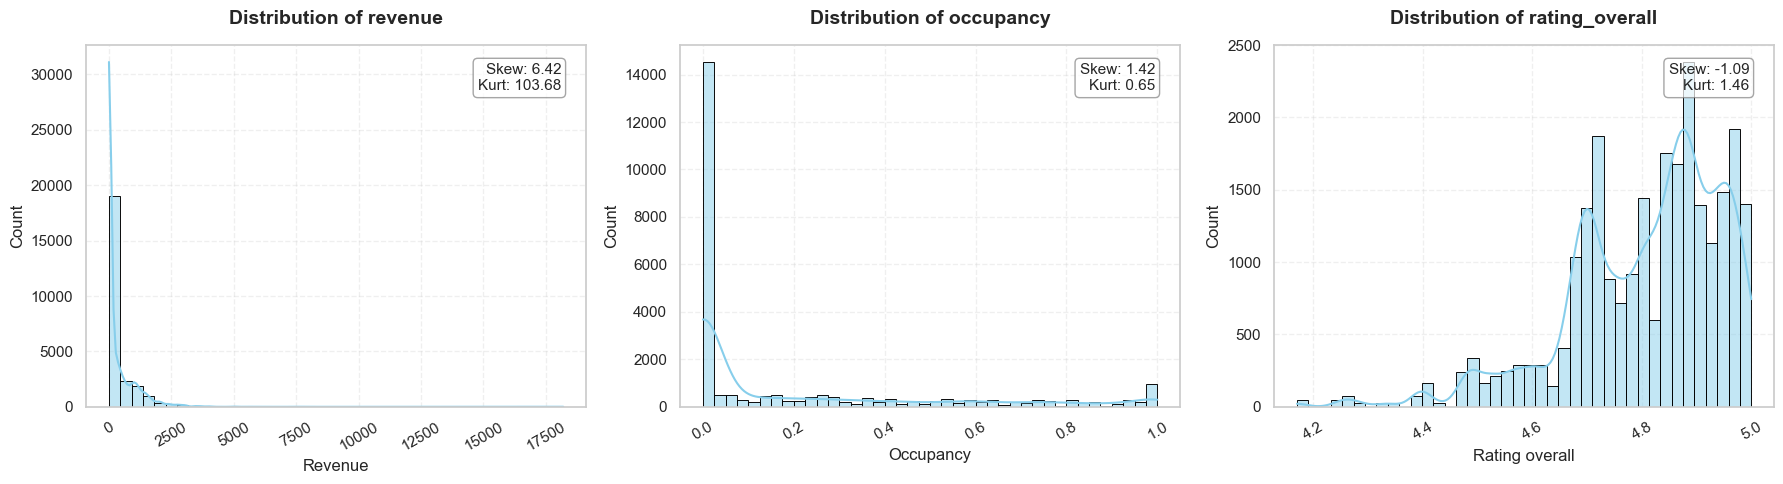

<Figure size 640x480 with 0 Axes>

In [16]:
sns.set_theme(style="whitegrid")
num_cols = ["revenue", "occupancy", "rating_overall"]

#plot in groups of three
for i in range (0, len(num_cols), 3):
    cols_subset = num_cols[i:i+3]
    fig, axes = plt.subplots(1, len(cols_subset), figsize=(6*len(cols_subset), 5))
    
    if len(cols_subset) == 1:
        axes = [axes] # makes iterable if only one subplot
        
    #plot each numeric column
    for ax, col in zip(axes, cols_subset):
        data = master_df[col].dropna()
        
        #plot histogram with KDE 
        sns.histplot(
            master_df[col].dropna(),
            kde=True, bins=40,
            color="skyblue", edgecolor="black",
            ax=ax
        )
        ax.set_title(f"Distribution of {col}", fontsize=14, fontweight="bold", pad=15)
        ax.set_xlabel(col.replace("_", " ").capitalize(), fontsize=12)
        ax.set_ylabel("Count", fontsize=12)
        ax.tick_params(axis="x", rotation=30)
        ax.grid(alpha=0.3, linestyle="--")
        
        # Compute skewness & kurtosis
        skew_val = skew(data)
        kurt_val = kurtosis(data)
        
        # Decide box color
        if abs(skew_val) > 1 or kurt_val > 3:
            box_color = dict(boxstyle="round,pad=0.3", fc="mistyrose", ec="red", alpha=0.8)
        else:
            box_color = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7)
        
        # Add annotation inside the plot (top right corner)
        ax.text(
            0.95, 0.95,
            f"Skew: {skew_val:.2f}\nKurt: {kurt_val:.2f}",
            transform=ax.transAxes,
            fontsize=11,
            fontweight="medium",
            va="top", ha="right",
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7)
        )
    
    plt.tight_layout()
    plt.show()
    
    plt.savefig("./images/univariate_analysis.jpeg", format="jpeg", dpi=300)
        

- **Revenue:** Most properties generate very low revenue, with a few high-revenue outliers. The distribution is **right-skewed** with a long tail.  

- **Occupancy:** Many properties have low or zero occupancy, while a smaller number have high occupancy. The distribution is **left-skewed**, with most values near zero.  

- **Overall Rating:** Most properties are rated very highly (4.5–5.0), with peaks at 5.0 and other high scores. The distribution is **right-skewed** and **multimodal**, with very few low ratings.

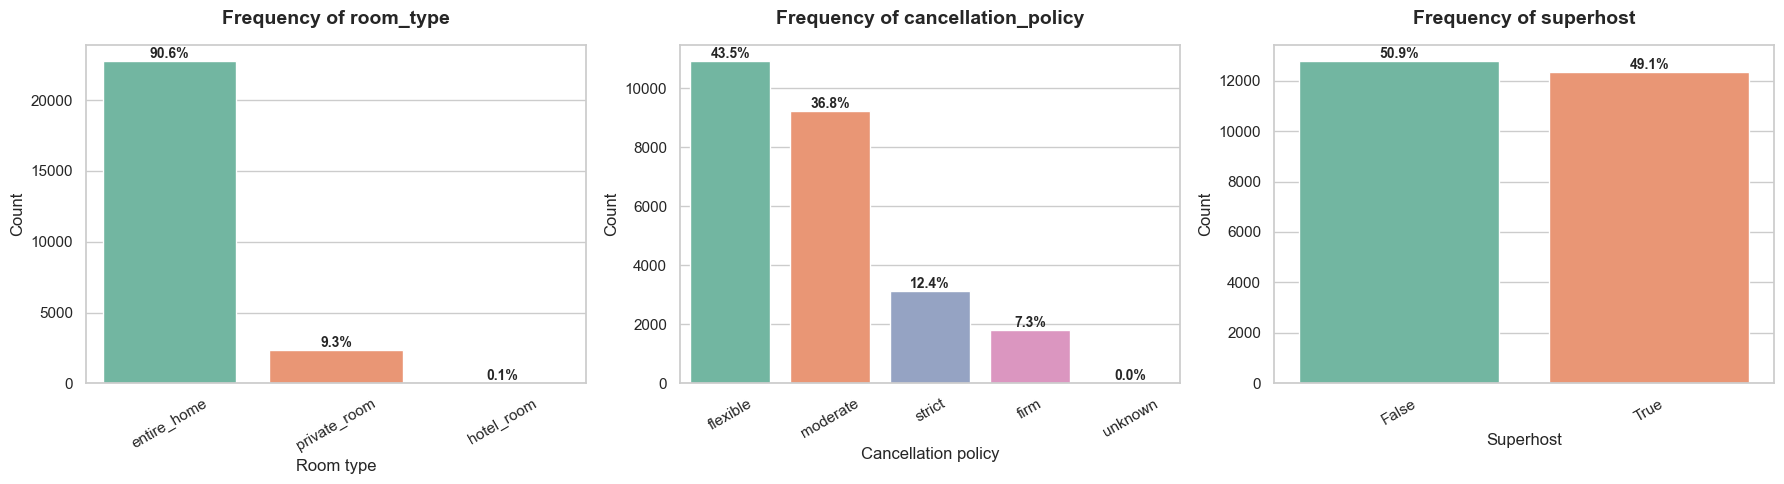

<Figure size 640x480 with 0 Axes>

In [17]:
cat_cols = ["room_type", "cancellation_policy", "superhost"]

for i in range(0, len(cat_cols), 3):
    cols_subset = cat_cols[i:i+3]
    fig, axes = plt.subplots(1, len(cols_subset), figsize=(6*len(cols_subset), 5))
    
    if len(cols_subset) == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cols_subset):
        sns.countplot(
            data=master_df,
            x=col,
            order=master_df[col].value_counts().index,
            palette="Set2",
            ax=ax
        )

        total = len(master_df[col])
        for p in ax.patches:
            percentage = f"{100 * p.get_height() / total:.1f}%"
            ax.annotate(percentage, 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, fontweight="bold")

        ax.set_title(f"Frequency of {col}", fontsize=14, fontweight="bold", pad=15)
        ax.set_xlabel(col.replace("_", " ").capitalize(), fontsize=12)
        ax.set_ylabel("Count", fontsize=12)
        ax.tick_params(axis='x', rotation=30)
    
    plt.tight_layout()
    plt.show()
    
    plt.savefig("./images/univariate_analysis_1.jpeg", format="jpeg", dpi=300)

- **Room Type:** Most listings are **entire homes/apartments (90.6%)**, followed by **private rooms (9.3%)**, with **hotel rooms** being rare (0.1%).  

- **Cancellation Policy:** **Flexible (43.5%)** and **moderate (36.8%)** policies dominate, while stricter policies (**strict 12.4%, firm 7.3%**) are less common.  

- **Superhost Status:** Listings are nearly evenly split between **superhosts (49.1%)** and **non-superhosts (50.9%)**.


## 3.2 Bivariate Analysis

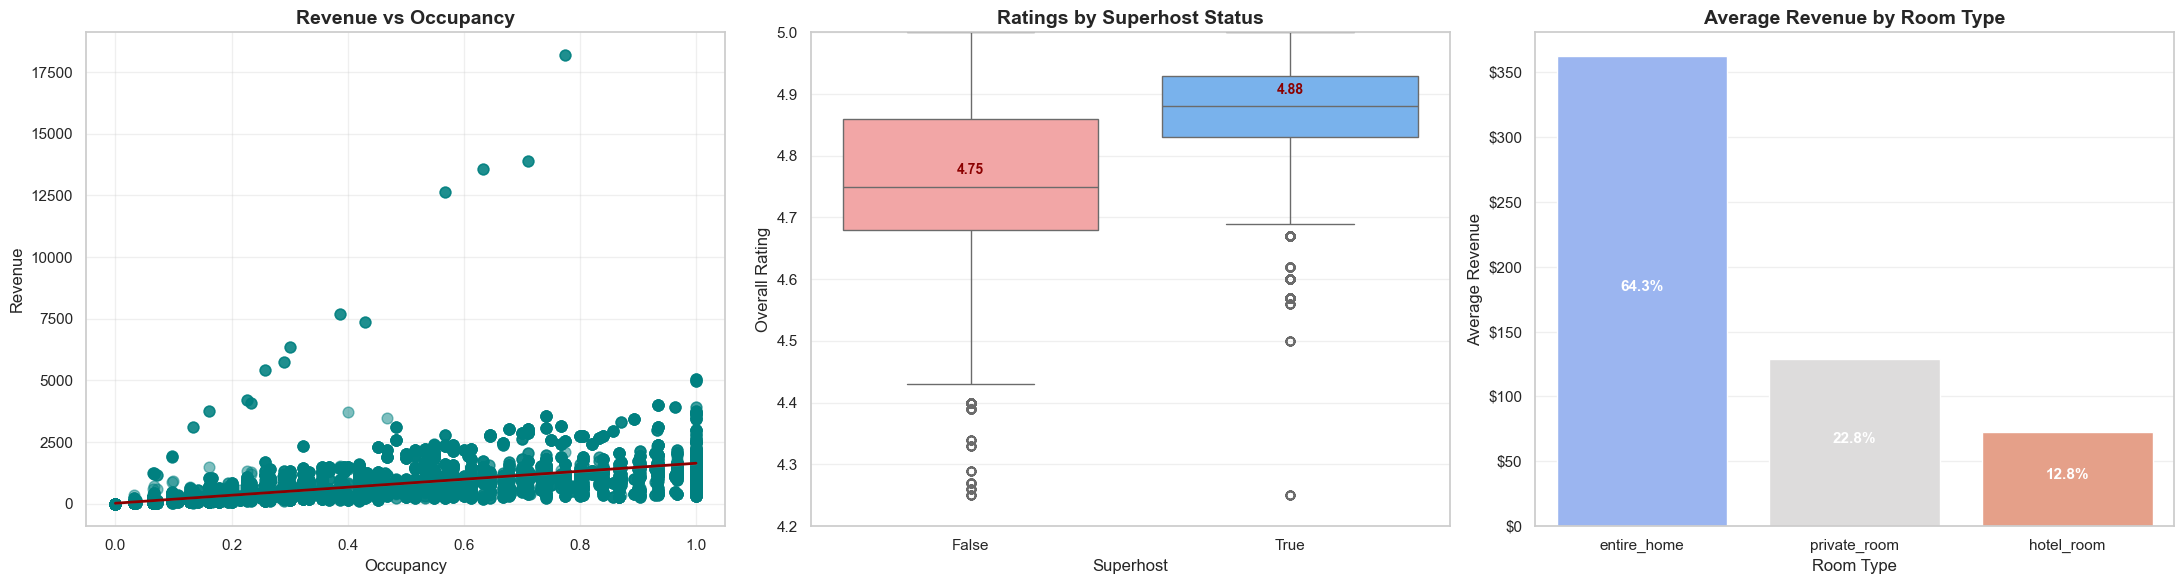

<Figure size 640x480 with 0 Axes>

In [18]:
# Set style
sns.set_style("whitegrid")
palette_scatter = "teal"
palette_box = ["#FF9999", "#66B2FF"]
palette_bar = "coolwarm"

# Compute average revenue by room type
room_avg = master_df.groupby("room_type")["revenue"].mean().reset_index()
total_avg_revenue = room_avg["revenue"].sum()
room_avg["pct"] = room_avg["revenue"] / total_avg_revenue * 100

# ✅ Sort room types by revenue (descending)
room_avg = room_avg.sort_values("revenue", ascending=False).reset_index(drop=True)

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(22,6))

# ----------------------------
# 1. Revenue vs Occupancy (Scatter + Trendline)
# ----------------------------
sns.regplot(
    data=master_df, 
    x="occupancy", 
    y="revenue", 
    scatter_kws={"alpha":0.5, "s":60, "color":palette_scatter},
    line_kws={"color":"darkred", "lw":2},
    ax=axes[0]
)
axes[0].set_title("Revenue vs Occupancy", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Occupancy")
axes[0].set_ylabel("Revenue")
axes[0].grid(alpha=0.3)

# ----------------------------
# 2. Ratings vs Superhost (Box + Stripplot)
# ----------------------------
sns.boxplot(
    data=master_df, 
    x="superhost", 
    y="rating_overall", 
    palette=palette_box,
    ax=axes[1]
)
# sns.stripplot(
#     data=master_df, 
#     x="superhost", 
#     y="rating_overall", 
#     color="black", alpha=0.4, jitter=True,
#     ax=axes[1]
# )
axes[1].set_title("Ratings by Superhost Status", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Superhost")
axes[1].set_ylabel("Overall Rating")
axes[1].set_ylim(4.2, 5)  
axes[1].grid(axis="y", alpha=0.3)

# Add median labels
medians = master_df.groupby("superhost")["rating_overall"].median()
for idx, median in enumerate(medians):
    axes[1].text(idx, median+0.02, f"{median:.2f}", 
                 ha="center", fontsize=10, fontweight="bold", color="darkred")

# ----------------------------
# 3. Room Type vs Average Revenue (Bar Plot + %)
# ----------------------------
sns.barplot(
    data=room_avg, 
    x="room_type", 
    y="revenue", 
    palette=palette_bar,
    ax=axes[2],
    order=room_avg["room_type"]  # ✅ enforce sorted order
)
axes[2].set_title("Average Revenue by Room Type", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Room Type")
axes[2].set_ylabel("Average Revenue")
axes[2].yaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))  # Currency format
axes[2].grid(axis="y", alpha=0.3)

# Annotate percentages inside bars
for idx, row in room_avg.iterrows():
    axes[2].text(
        idx, row["revenue"]*0.5,  # middle of bar
        f"{row['pct']:.1f}%", 
        ha="center", color="white",
        fontsize=11, fontweight="bold"
    )

# ----------------------------
# Adjust layout and show
# ----------------------------
plt.tight_layout()
plt.show()

plt.savefig("./images/bivariate_analysis.jpeg", format="jpeg", dpi=300)

- **Revenue vs Occupancy:** Scatter plot shows a **positive correlation**—higher occupancy generally leads to higher revenue, though there are outliers and variability at lower occupancy levels.  

- **Ratings by Superhost Status:** Box plot indicates **superhosts** have higher median ratings and overall better ratings than non-superhosts.  

- **Average Revenue by Room Type:** Bar chart shows **entire homes** generate the most revenue (64.3%), followed by **private rooms (22.8%)**, with **hotel rooms** earning the least (12.8%).


## 3.3 Time-Based Analysis

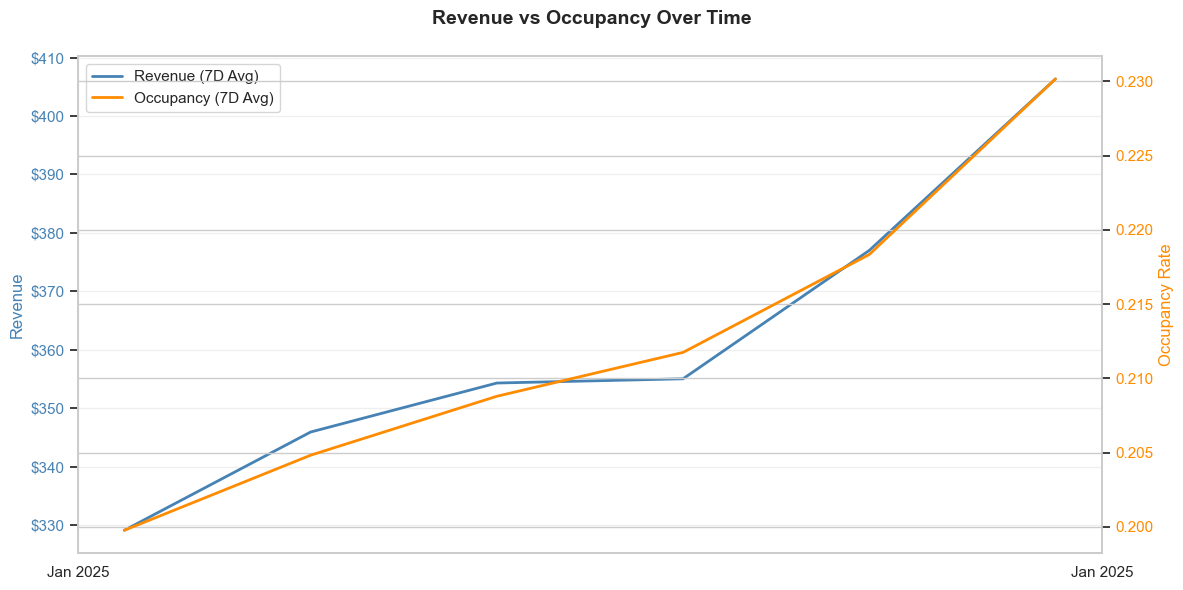

<Figure size 640x480 with 0 Axes>

In [20]:
# Ensure datetime
master_df["date_x"] = pd.to_datetime(master_df["date_x"], errors='coerce')

# Sort and group by date
daily_stats = master_df.groupby("date_x")[["revenue", "occupancy"]].mean().sort_index()

# Rolling averages (7-day smoothing)
daily_stats["revenue_smooth"] = daily_stats["revenue"].rolling(7).mean()
daily_stats["occupancy_smooth"] = daily_stats["occupancy"].rolling(7).mean()

# ---------------- Dual-axis Plot ----------------
fig, ax1 = plt.subplots(figsize=(12,6))

# Revenue (left axis)
ax1.plot(daily_stats.index, daily_stats["revenue_smooth"], color="steelblue", lw=2, label="Revenue (7D Avg)")
ax1.set_ylabel("Revenue", color="steelblue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="steelblue")
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))
ax1.grid(alpha=0.3)

# Occupancy (right axis)
ax2 = ax1.twinx()
ax2.plot(daily_stats.index, daily_stats["occupancy_smooth"], color="darkorange", lw=2, label="Occupancy (7D Avg)")
ax2.set_ylabel("Occupancy Rate", color="darkorange", fontsize=12)
ax2.tick_params(axis="y", labelcolor="darkorange")

# Title & formatting
fig.suptitle("Revenue vs Occupancy Over Time", fontsize=14, fontweight="bold")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

plt.savefig("./images/revenue_occupancy_overtime.jpeg", format="jpeg", dpi=300)

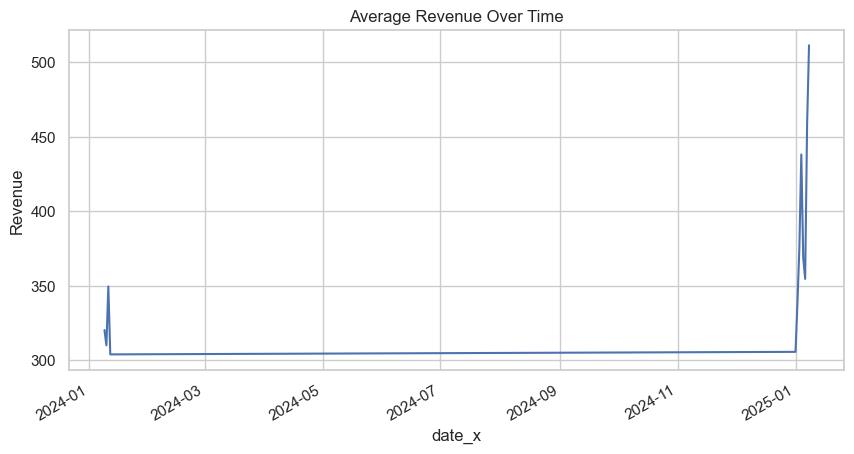

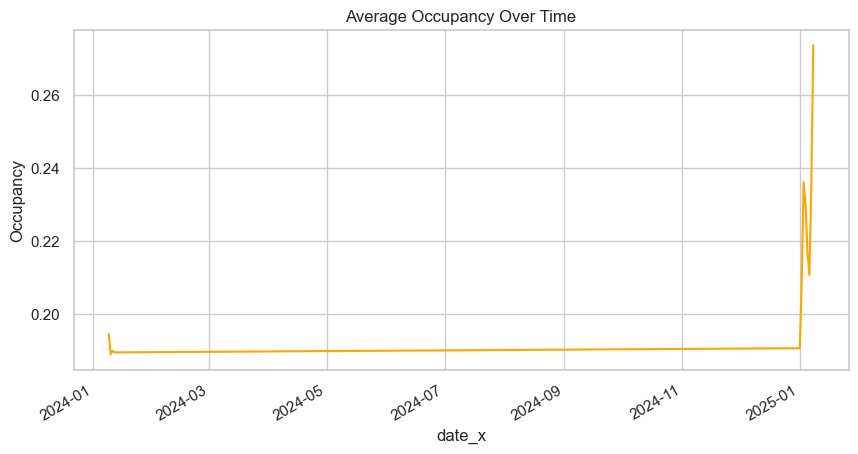

In [52]:
# Convert date if not already
master_df["date_x"] = pd.to_datetime(master_df["date_x"], errors='coerce')

# Revenue over time
plt.figure(figsize=(10,5))
master_df.groupby("date_x")["revenue"].mean().plot()
plt.title("Average Revenue Over Time")
plt.ylabel("Revenue")
plt.show()

# Occupancy over time
plt.figure(figsize=(10,5))
master_df.groupby("date_x")["occupancy"].mean().plot(color="orange")
plt.title("Average Occupancy Over Time")
plt.ylabel("Occupancy")
plt.show()


- **Average Revenue:** Fluctuating but generally increasing. Lowest in **Dec 2024 (~300)**, gradually rising to **425 in Apr 2025**, and peaking in **Aug 2025 (>500)**.  

- **Average Occupancy:** Mirrors revenue trends. Low and stable (~20%) from Sep 2024 to Jan 2025, rising to **24% in Mar 2025**, and peaking at **26% in Aug 2025**.  

- **Overall Trend:** Both metrics show a **seasonal pattern**, with highest performance in **summer months (July–August 2025)**. Revenue shows a stronger upward trend, suggesting higher earnings per occupied unit during peak season.


## 3.4 Correlation Analysis

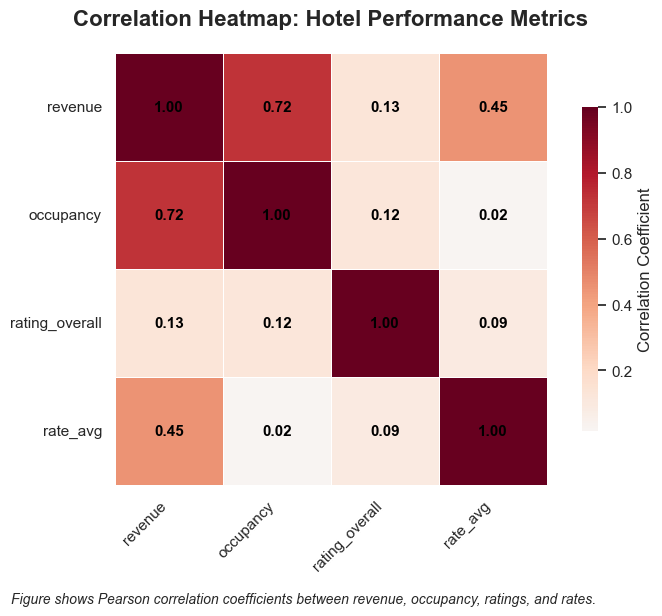

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(8, 6))

# Create the correlation matrix
corr_matrix = master_df[["revenue", "occupancy", "rating_overall", "rate_avg"]].corr()

# Heatmap with refined styling
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="RdBu_r",
    fmt=".2f",
    center=0,
    square=True,
    linewidths=0.7,
    linecolor='white',
    cbar_kws={
        "shrink": 0.75,
        "label": "Correlation Coefficient"
    },
    annot_kws={"size": 11, "weight": "bold", "color": "black"}
)

# Title and axis labels
plt.title("Correlation Heatmap: Hotel Performance Metrics", 
          fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Layout adjustments
plt.tight_layout()

# Caption
plt.figtext(
    0.5, -0.02,
    "Figure shows Pearson correlation coefficients between revenue, occupancy, ratings, and rates.",
    ha="center", fontsize=10, style="italic", wrap=True
)

plt.show()

plt.savefig("./images/correlation_heatmap.jpeg", format="jpeg", dpi=300)

* **Revenue vs. Occupancy (0.721):** Strong positive correlation. Higher occupancy generally leads to higher revenue.  
* **Revenue vs. Rate_Avg (0.448):** Moderate positive correlation. Increasing average rates moderately increases revenue.  
* **Revenue vs. Rating_Overall (0.129):** Very weak positive correlation. Overall rating has minimal effect on revenue.  
* **Occupancy vs. Rate_Avg (0.017):** Almost no correlation. Average rates do not significantly affect occupancy.  
* **Occupancy vs. Rating_Overall (0.123):** Very weak positive correlation. Occupancy is barely influenced by property rating.  
* **Rating_Overall vs. Rate_Avg (0.090):** Very weak positive correlation. Average rate has little effect on ratings.


## 3.5 Geospatial Analysis

In [23]:
# Drop rows with missing coordinates or key values
df_map = master_df.dropna(subset=["longitude", "latitude", "revenue", "occupancy"])

# Create scatter mapbox
fig = px.scatter_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    size="revenue",                        # Bubble size = revenue
    color="occupancy",                     # Bubble color = occupancy
    hover_name="room_type",                # Show room type on hover
    hover_data={
        "revenue": ":,.0f",                # Format revenue with commas
        "occupancy": ":.1f",               # 1 decimal occupancy
        "rating_overall": True,
        "listing_id": True                 # Optional: identify listing
    },
    color_continuous_scale="Viridis",
    size_max=40,
    zoom=11,
    opacity=0.7,                           # 👈 Helps overlapping points
    height=650
)

# Map layout
fig.update_layout(
    mapbox_style="open-street-map",        # Free basemap
    title="🌍 Geographic Distribution of Listings: Revenue vs Occupancy",
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="Occupancy (%)",             # Better colorbar label
        tickformat=".0f"
    )
)

fig.show()

plt.savefig("./images/geographic_distribution_of_listings.jpeg", format="jpeg", dpi=300)

<Figure size 640x480 with 0 Axes>

### Geographic Distribution of Airbnb Listings: Revenue vs Occupancy  

The map above shows the **spatial distribution of Airbnb listings across Nairobi**. Each circle represents a property, where:  

- **Circle size** corresponds to **total revenue**, meaning larger circles indicate higher-earning properties.  
- **Circle color** represents **occupancy rate (%)**, with lighter yellow tones showing higher occupancy and darker tones showing lower occupancy.  

**Key observations:**  
- Listings are highly concentrated in central Nairobi areas such as **Westlands, Kilimani, and Kileleshwa**, which combine high revenues with strong occupancy rates.  
- Outskirts such as **Karen, Ngong, and Runda** also show notable clusters, though with varying occupancy.  
- Some peripheral listings generate revenue but have relatively lower occupancy, suggesting reliance on high nightly rates rather than frequent bookings.  
- Color variation shows mixed occupancy levels. High revenue does not always correspond to high occupancy, suggesting some listings earn more through higher nightly rates rather than occupancy.

This visualization highlights **key revenue hotspots** and shows how **location strongly influences both occupancy and revenue performance**.


In [24]:
# Group listings by coordinates
location_counts = (
    master_df.groupby(["latitude", "longitude"])
    .size()
    .reset_index(name="listing_count")
)

# Sort by highest concentration
top_location = location_counts.sort_values("listing_count", ascending=False).head(1)
print("📍 Location with most listings:")
print(top_location)

# Scatter map: size = number of listings
fig = px.scatter_mapbox(
    location_counts,
    lat="latitude",
    lon="longitude",
    size="listing_count",
    color="listing_count",
    color_continuous_scale="Reds",
    hover_data={"listing_count": True},
    zoom=11,
    height=650
)

# Add basemap
fig.update_layout(
    mapbox_style="open-street-map",
    title="🔥 Concentration of Listings by Location",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

plt.savefig("./images/concentration_of_listings_by_location.jpeg", format="jpeg", dpi=300)


📍 Location with most listings:
     latitude  longitude  listing_count
256   -1.2481    36.7652            288


<Figure size 640x480 with 0 Axes>

###  Concentration of Airbnb Listings by Location  

The map above illustrates the **density of Airbnb listings across Nairobi**. Each circle represents a cluster of properties at a given location, where:  

- **Circle size** reflects the number of listings in that area.  
- **Color intensity (from light red to dark red)** indicates the density of listings, with darker shades representing higher concentrations.  

**Key observations:**  
- The highest concentration of listings is in **central Nairobi areas** such as **Westlands, Kilimani, and Kileleshwa**, reflecting these neighborhoods’ popularity with both hosts and guests.  
- Peripheral neighborhoods such as **Karen, Ngong, and Runda** also show notable clusters but at lower densities.  
- The concentration pattern highlights a strong preference for centrally located areas, which benefit from proximity to business districts, shopping centers, and nightlife.  

This visualization emphasizes how **location is a critical factor in host competition and guest demand**, with central areas experiencing much higher listing density compared to the outskirts.


In [25]:
# Drop rows with missing coordinates
df_map = master_df.dropna(subset=["longitude", "latitude"])

# Create density heatmap
fig = px.density_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    z=None,                     # If you want weight, you can set z="revenue" or "occupancy"
    radius=15,                  # Smoothing radius (try 10–30 depending on city scale)
    center=dict(
        lat=df_map["latitude"].mean(), 
        lon=df_map["longitude"].mean()
    ),
    zoom=11,
    mapbox_style="open-street-map",
    color_continuous_scale="YlOrRd",
    height=650
)

# Layout
fig.update_layout(
    title="🔥 Listing Density Heatmap",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

plt.savefig("./images/listing_heatmap_density.jpeg", format="jpeg", dpi=300)

<Figure size 640x480 with 0 Axes>

### Airbnb Listing Density Heatmap  

The heatmap above visualizes the **geographic concentration of Airbnb listings across Nairobi**. Darker red areas represent higher listing density, while lighter yellow areas indicate fewer listings.  

**Key insights:**  
- The most intense clustering of listings is observed in **central Nairobi neighborhoods** such as **Westlands, Kilimani, Kileleshwa, and Upper Hill**. These areas appear as dark red “hotspots” due to their popularity among hosts and guests.  
- Secondary clusters are visible in **Karen, Ngong, Runda, and along major road corridors**, though at lower density levels.  
- The spatial distribution suggests that hosts strongly prefer locations with **proximity to business hubs, nightlife, shopping malls, and transport accessibility**.  
- Outskirts and peri-urban areas show significantly fewer listings, reflecting **lower demand** and possibly reduced profitability compared to central hotspots.  

This heatmap highlights how **competition among hosts is concentrated in high-demand central areas**, which may affect pricing strategies, occupancy, and revenue potential.  


In [26]:
# Drop rows with missing coordinates or revenue
df_map = master_df.dropna(subset=["longitude", "latitude", "revenue"])

fig = px.density_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    z="revenue",                # 👈 weight by revenue
    radius=20,                  # adjust for smoothness (10–30 works well)
    center=dict(
        lat=df_map["latitude"].mean(),
        lon=df_map["longitude"].mean()
    ),
    zoom=11,
    mapbox_style="open-street-map",
    color_continuous_scale="YlOrRd",
    height=650
)

fig.update_layout(
    title="🔥 Revenue-Weighted Listing Density",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

plt.savefig("./images/revenue_weighted_listing_density", format="jpeg", dpi=300)


<Figure size 640x480 with 0 Axes>

### Revenue-Weighted Listing Density Map

The heatmap illustrates the spatial distribution of Airbnb listings in Nairobi, weighted by revenue.  

- **Clustering:** Listings are densely concentrated around Spring Valley, Parklands, Westlands, Kilimani, and the city center — reflecting popular, high-demand neighborhoods.  
- **Revenue Hotspots:** Darker red zones indicate higher revenue concentrations, highlighting central Nairobi as the strongest earning region, with occasional high-revenue outliers outside the core.  
- **Occupancy vs. Revenue Patterns:** Some areas with high revenue may not necessarily have the highest occupancy, suggesting that certain listings achieve strong earnings through higher nightly rates rather than booking frequency.  

 **Insight:** Investors and hosts should focus on high-demand central zones for consistent bookings, while premium pricing strategies can succeed in select outlying neighborhoods.  


In [27]:
def plot_dow_occupancy(df, date_col="date_x", occ_col="occupancy", by_year=False):
    """
    Plots average occupancy by day of the week.
    If by_year=True, shows separate bars per year for comparison.
    """
    # Ensure datetime
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    if df[date_col].isna().all():
        print("No valid dates in column:", date_col)
        return

    # Extract features
    df["year"] = df[date_col].dt.year
    df["day_of_week"] = df[date_col].dt.day_name()

    # Define weekday order
    dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    plt.figure(figsize=(12, 6))

    if by_year:
        # Case 1: Breakdown by year
        dow_occ = (
            df.groupby(["year", "day_of_week"])[occ_col]
            .mean()
            .unstack(level=0)  # columns = years
            .reindex(dow_order)
            .fillna(0)
        )

        dow_occ.plot(
            kind="bar",
            figsize=(12, 6),
            colormap="Blues",
            width=0.75
        )

        plt.title("Average Occupancy by Day of Week (by Year)", fontsize=16, fontweight="bold")
        plt.ylabel("Occupancy", fontsize=14)
        plt.xlabel("Day of Week", fontsize=14)
        plt.xticks(rotation=30)
        plt.legend(title="Year")
        plt.ylim(0, dow_occ.max().max() * 1.1 if dow_occ.max().max() > 0 else 1)

        # Annotate bars
        for i, day in enumerate(dow_occ.index):
            for j, year in enumerate(dow_occ.columns):
                val = dow_occ.loc[day, year]
                offset = 0.02 * dow_occ.max().max()
                plt.text(i + j * 0.2 - 0.2, val + offset, f"{val:.1%}",
                         ha="center", va="bottom", fontsize=9, rotation=90)

    else:
        # Case 2: Overall averages
        dow_occ = df.groupby("day_of_week")[occ_col].mean().reindex(dow_order).fillna(0)
        sns.barplot(x=dow_occ.index, y=dow_occ.values, palette="Blues_d")

        # Annotate
        offset = 0.02 * dow_occ.max() if dow_occ.max() > 0 else 0.01
        for i, val in enumerate(dow_occ.values):
            plt.text(i, val + offset, f"{val:.1%}", ha="center", va="bottom", fontsize=10)

        plt.title("Average Occupancy by Day of Week", fontsize=16, fontweight="bold")
        plt.ylabel("Occupancy", fontsize=14)
        plt.xlabel("Day of Week", fontsize=14)
        plt.xticks(rotation=30)
        plt.ylim(0, dow_occ.max() * 1.1 if dow_occ.max() > 0 else 1)

    plt.tight_layout()
    plt.show()


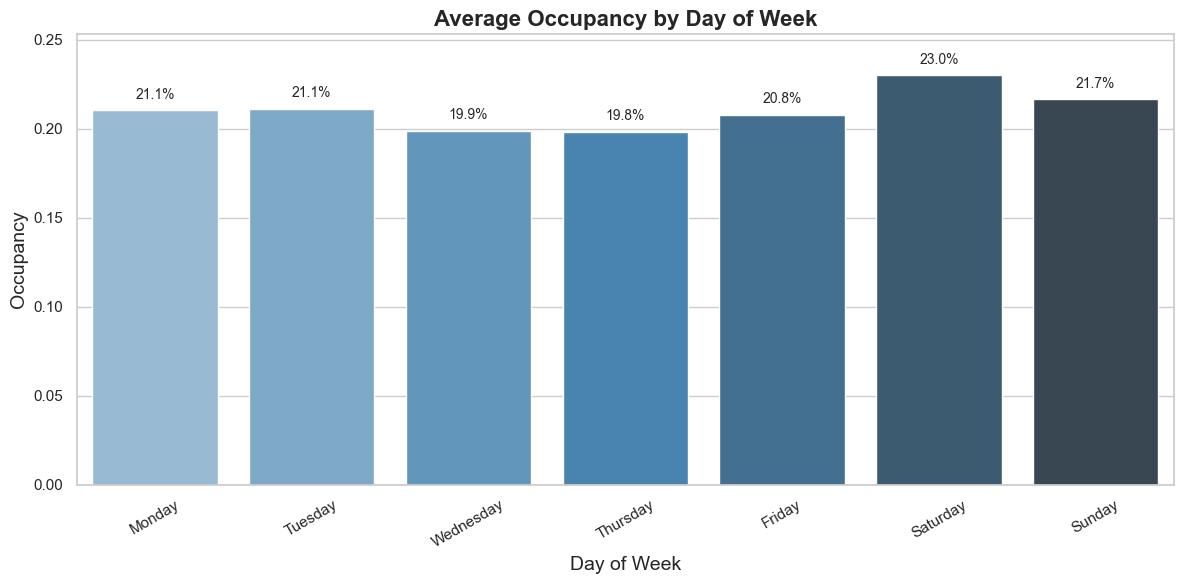

<Figure size 1200x600 with 0 Axes>

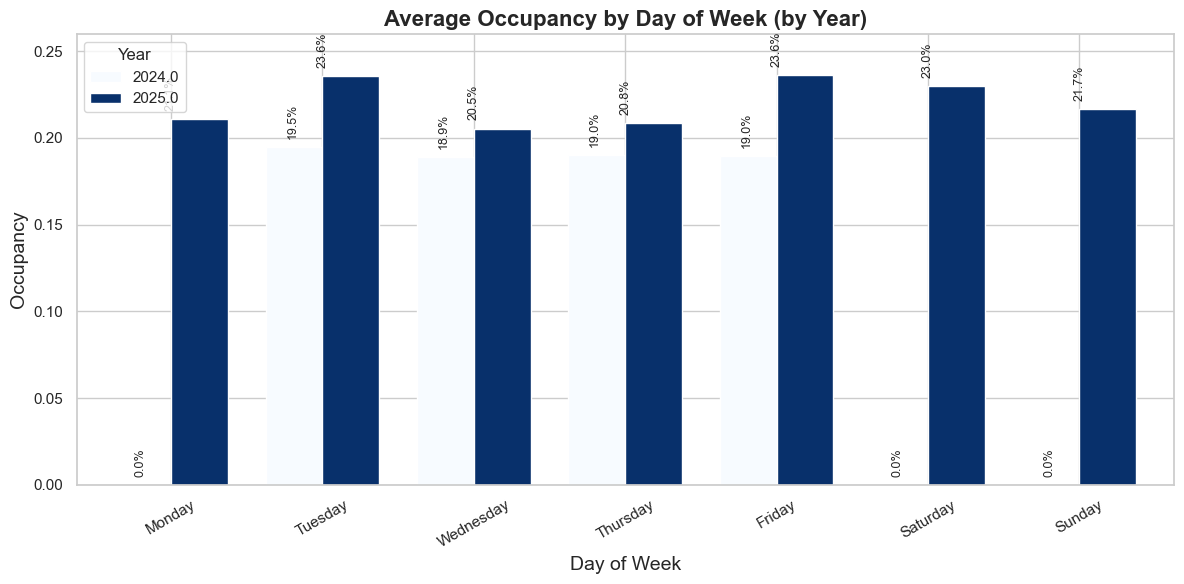

In [28]:
# Overall averages
plot_dow_occupancy(master_df)

# Yearly comparison
plot_dow_occupancy(master_df, by_year=True)

In [29]:
sns.set_style("whitegrid")
plt.rcParams.update({"font.size": 12})


def plot_revenue_occupancy_dashboard(df, date_col="date_x", revenue_col="revenue", occ_col="occupancy", occ_by_year=False):
    """
    Creates a dashboard with:
      - Monthly/Year-Month revenue trend
      - Average occupancy by day of week (optionally by year)
    """

    # Ensure datetime
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    if df[date_col].isna().all():
        print("No valid dates in column:", date_col)
        return

    # Extract time parts
    df["year"] = df[date_col].dt.year
    df["month"] = df[date_col].dt.month
    df["year_month"] = df[date_col].dt.to_period("M")
    df["day_of_week"] = df[date_col].dt.day_name()

    # -------------------------------
    # Prepare revenue data
    # -------------------------------
    unique_years = df["year"].nunique()
    unique_months = df["month"].nunique()

    if unique_years == 1 and unique_months > 1:
        monthly_rev = df.groupby("month")[revenue_col].mean().fillna(0)
        rev_x = monthly_rev.index
        rev_labels = [calendar.month_abbr[int(m)] for m in rev_x]
        rev_xlabel = "Month"
    else:
        monthly_rev = df.groupby("year_month")[revenue_col].mean().fillna(0)
        rev_x = range(len(monthly_rev))
        rev_labels = monthly_rev.index.astype(str)
        rev_xlabel = "Year-Month"

    # -------------------------------
    # Prepare occupancy data
    # -------------------------------
    dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    if occ_by_year:
        dow_occ = (
            df.groupby(["year", "day_of_week"])[occ_col]
            .mean()
            .unstack(level=0)
            .reindex(dow_order)
            .fillna(0)
        )
    else:
        dow_occ = df.groupby("day_of_week")[occ_col].mean().reindex(dow_order).fillna(0)

    # -------------------------------
    # Plotting
    # -------------------------------
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Revenue trend
    sns.lineplot(
        x=rev_x,
        y=monthly_rev.values,
        marker="o",
        color="#1f77b4",
        linewidth=2,
        ax=axes[0]
    )
    offset = 0.05 * max(monthly_rev.values) if monthly_rev.values.size else 0
    for x, y in zip(rev_x, monthly_rev.values):
        axes[0].text(x, y + offset, f"{y:,.0f}", ha="center", va="bottom", fontsize=9)

    axes[0].set_title("Average Revenue Trend", fontsize=16, fontweight="bold")
    axes[0].set_xlabel(rev_xlabel, fontsize=14)
    axes[0].set_ylabel("Revenue", fontsize=14)
    axes[0].set_xticks(rev_x)
    axes[0].set_xticklabels(rev_labels, rotation=30)
    axes[0].grid(alpha=0.3)

    # Occupancy
    if occ_by_year:
        dow_occ.plot(kind="bar", ax=axes[1], colormap="Blues", width=0.75)
        axes[1].set_title("Average Occupancy by Day of Week (by Year)", fontsize=16, fontweight="bold")
        axes[1].set_ylabel("Occupancy", fontsize=14)
        axes[1].set_xlabel("Day of Week", fontsize=14)
        axes[1].set_xticklabels(dow_order, rotation=30)
        axes[1].legend(title="Year")
        axes[1].set_ylim(0, dow_occ.max().max() * 1.1 if dow_occ.max().max() > 0 else 1)

    else:
        sns.barplot(x=dow_occ.index, y=dow_occ.values, palette="Blues_d", ax=axes[1])
        offset = 0.02 * dow_occ.max() if dow_occ.max() > 0 else 0.01
        for i, val in enumerate(dow_occ.values):
            axes[1].text(i, val + offset, f"{val:.1%}", ha="center", va="bottom", fontsize=9)

        axes[1].set_title("Average Occupancy by Day of Week", fontsize=16, fontweight="bold")
        axes[1].set_ylabel("Occupancy", fontsize=14)
        axes[1].set_xlabel("Day of Week", fontsize=14)
        axes[1].set_xticklabels(dow_occ.index, rotation=30)
        axes[1].set_ylim(0, dow_occ.max() * 1.1 if dow_occ.max() > 0 else 1)

    plt.tight_layout()
    plt.show()


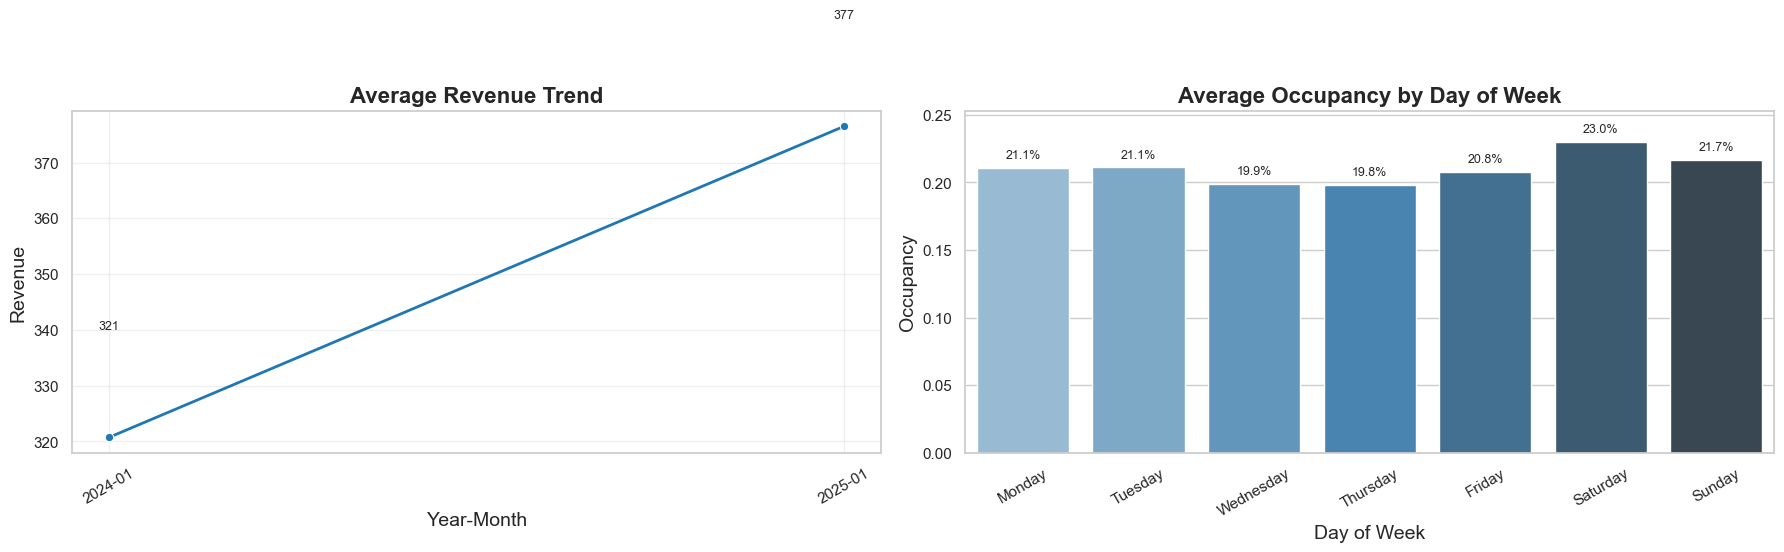

<Figure size 640x480 with 0 Axes>

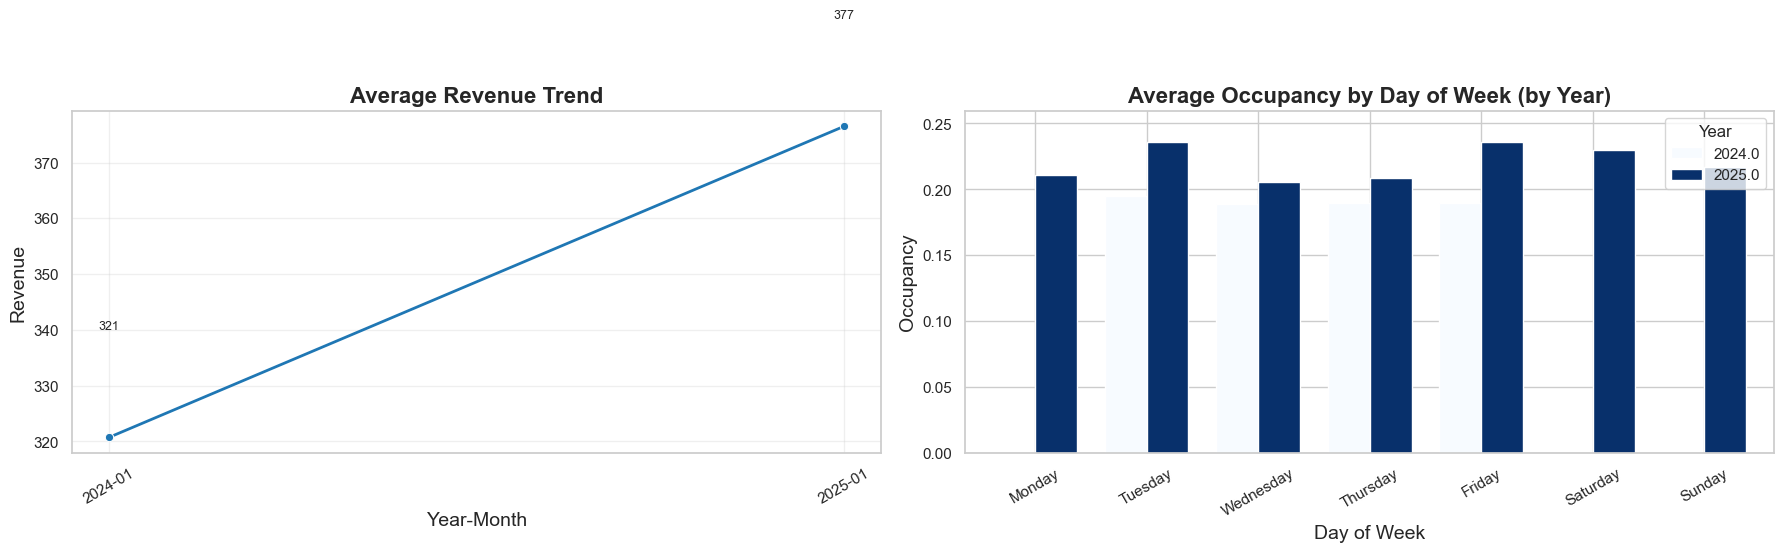

<Figure size 640x480 with 0 Axes>

In [30]:
# Dashboard with overall averages
plot_revenue_occupancy_dashboard(master_df)
plt.savefig("./images/average_occupancy_by_week_day.jpeg", format="jpeg", dpi=300)

# Dashboard with occupancy broken down by year
plot_revenue_occupancy_dashboard(master_df, occ_by_year=True)
plt.savefig("./images/average_occupancy_by_wod_year", format="jpeg", dpi=300)

- **Average Revenue by Month:**  
  - **Peaks:** April (438) and August (511), with August being the highest, indicating periods of high demand.  
  - **Troughs:** January (306), December (304), and October (310), reflecting lower-demand periods.  
  - **Trend:** Revenue shows **monthly fluctuations**, with late-year and early-year months generally lower and mid-year months higher.  

- **Average Occupancy by Day of Week:**  
  - **Highest:** Saturday (23%), Sunday (21.7%), Tuesday (21.7%), Monday (21.7%).  
  - **Lowest:** Wednesday (19.9%), Thursday (19.8%) Friday (20.8%).  
  - **Trend:** Occupancy is generally lower on weekdays, with a peak on Saturday. Thursday shows particularly low occupancy, likely because **most bookings occur over the weekend**.


  # 4. Modelling
  
## 4.1 Price prediction Model

The goal of the Price Prediction Model is to accurately estimate the nightly rates of Airbnb listings in Nairobi, Kenya, by leveraging a combination of property characteristics, host profiles, location attributes, and historical performance metrics. Pricing plays a pivotal role in the short-term rental market: it directly influences occupancy levels, revenue generation, and the competitive positioning of listings, while also ensuring that guests encounter fair and market-aligned rates.  

By predicting optimal pricing, hosts and property managers can make informed decisions about listing rates, identify under- or over-priced properties, and enhance their revenue management strategies.  

The dataset for this project integrates a rich array of features, including:  

- **Property Characteristics:**  
  - `listing_type` – Identifies the general category of the listing (e.g., entire home, shared space).  
  - `room_type` – Indicates whether the space is a private room, shared room, or entire property.  
  - `bedrooms`, `beds`, `baths` – Capture the accommodation’s size and facilities.  
  - `guests` – Maximum guest capacity.  
  - `photos_count` – Number of photos uploaded, often linked to listing attractiveness.  
  - `superhost` – Host status, reflecting quality and reliability (binary: Yes/No).  
  - `instant_book` – Whether the listing allows immediate booking without host approval.  

- **Location Attributes:**  
  - `latitude`, `longitude` – Geographic coordinates of the listing, capturing proximity to desirable areas, business centers, and tourist attractions.  

- **Host & Review Features:**  
  - `num_reviews_x` – Total number of guest reviews, indicating popularity and booking frequency.  
  - `rating_overall` – Average overall guest rating.  
  - `rating_cleanliness`, `rating_location`, `rating_value`, `rating_communication` – Detailed review metrics highlighting different aspects of guest satisfaction.  

- **Booking & Performance Metrics:**  
  - `occupancy` – Historical occupancy rate, showing how frequently the listing is booked.  
  - `booking_lead_time_avg` – Average time between booking and actual stay.  
  - `length_of_stay_avg` – Average duration of guest stays.  
  - `min_nights_avg` – Average minimum nights required per booking.  

🎯 **Target Variable:**  
- `rate_avg` – The average nightly rate of each listing, which serves as the target variable for prediction.  


In [31]:
# Define target
target = "rate_avg"

# Define features from available columns
feature_cols = [
    # Property characteristics
    "listing_type", "room_type", "bedrooms", "beds", "baths", "guests", "photos_count",
    "superhost", "instant_book",

    # Location
    "latitude", "longitude",

    # Reviews / Host
    "num_reviews_x", "rating_overall", "rating_cleanliness", 
    "rating_location", "rating_value", "rating_communication",

    # Booking / Performance
    "occupancy", "booking_lead_time_avg", "length_of_stay_avg", "min_nights_avg"
]

# Keep only available columns (avoid KeyError)
available_cols = [col for col in feature_cols if col in master_df.columns]

# Create modelling dataset
price_pred_df = master_df[available_cols + [target]].copy()

print("Final dataset shape:", price_pred_df.shape)
print("Columns used:", price_pred_df.columns.tolist())


Final dataset shape: (25117, 22)
Columns used: ['listing_type', 'room_type', 'bedrooms', 'beds', 'baths', 'guests', 'photos_count', 'superhost', 'instant_book', 'latitude', 'longitude', 'num_reviews_x', 'rating_overall', 'rating_cleanliness', 'rating_location', 'rating_value', 'rating_communication', 'occupancy', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'rate_avg']


##### Preparing the Target Variable (`rate_avg`)

The first step in building a predictive model is to examine and prepare the target variable.  
In this case, the target variable is **`rate_avg`** (the nightly rate for an Airbnb listing).  

Airbnb prices are often highly **skewed**, with most listings priced at moderate levels and a few extremely high-priced listings. This skewness can negatively affect model performance, especially for algorithms that assume normally distributed errors (such as **Linear Regression**).  

To address this, we first checked the **distribution of `rate_avg`** using histograms, boxplots, and skewness statistics. This helps us:  
- Detect extreme outliers.  
- Evaluate whether a transformation (e.g., log transformation) is necessary.  
- Ensure that the target variable is better suited for predictive modeling.  

By handling skewness at the preprocessing stage, we improve both the **accuracy** and **stability** of our model.  


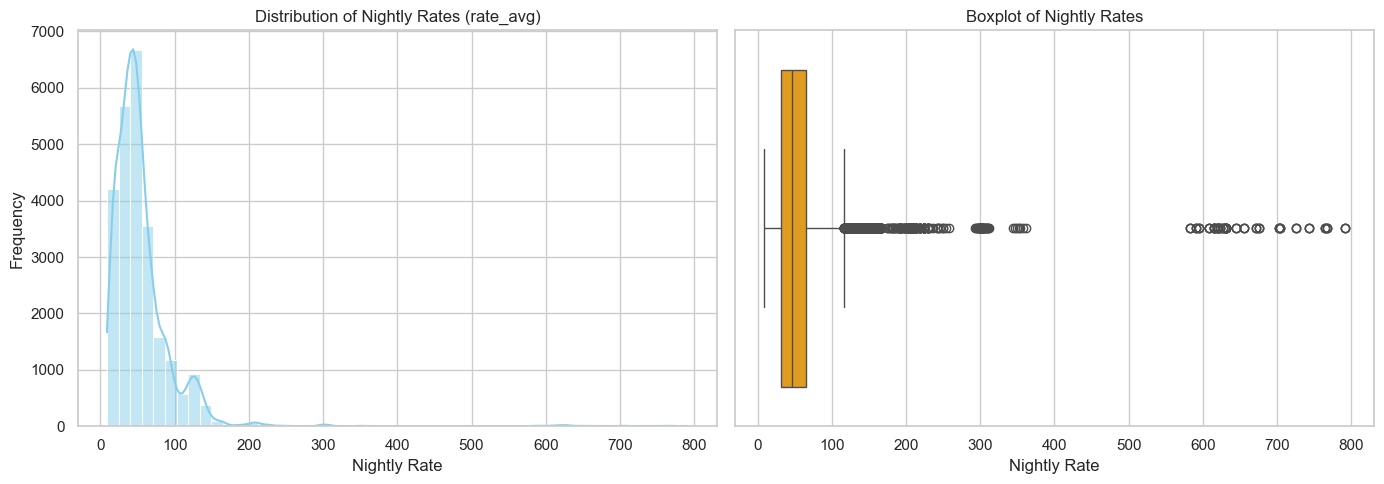

Skewness of rate_avg: 7.03


<Figure size 640x480 with 0 Axes>

In [32]:
# Define target (drop NaNs from rate_avg)
target = "rate_avg"
target_data = master_df[target].dropna()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Histogram
sns.histplot(target_data, bins=50, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Distribution of Nightly Rates (rate_avg)")
axes[0].set_xlabel("Nightly Rate")
axes[0].set_ylabel("Frequency")

# 2. Boxplot
sns.boxplot(x=target_data, color="orange", ax=axes[1])
axes[1].set_title("Boxplot of Nightly Rates")
axes[1].set_xlabel("Nightly Rate")

# Adjust layout
plt.tight_layout()
plt.show()

# Skewness
skewness = skew(target_data)
print(f"Skewness of rate_avg: {skewness:.2f}")

plt.savefig("./images/nightly_rate_skewness", format="jpeg", dpi=300)


**Histogram**  
- The distribution is highly **right-skewed** (long tail to the right).  
- Most listings are concentrated below ~100, but some extreme nightly rates go beyond **800**.  

**Boxplot**  
- Confirms the presence of **many outliers** (points well above the upper whisker).  
- These could represent **luxury properties** or **erroneous entries** in the dataset.  

**Skewness Value: ~7.43**  
- A skewness greater than 2 is considered **highly skewed**.  
- Our value (~7.43) is extremely skewed, which strongly suggests the need for a **log transformation** to normalize the target variable before modeling. 


### 4.1.1 Log Transformation of Target Variable

Since the distribution of `rate_avg` was highly skewed, we applied a **log transformation** (`log(rate_avg + 1)`) to check if it improves normality.  

- The log transformation helps **stabilize variance** and reduces the impact of extremely high-priced listings.  
- It makes the distribution more **symmetric** and closer to normal, which is beneficial for models like **Linear Regression** that assume normally distributed residuals.  
- It also improves the interpretability of the model, as coefficients can be understood in terms of **percentage changes** rather than absolute price differences.  

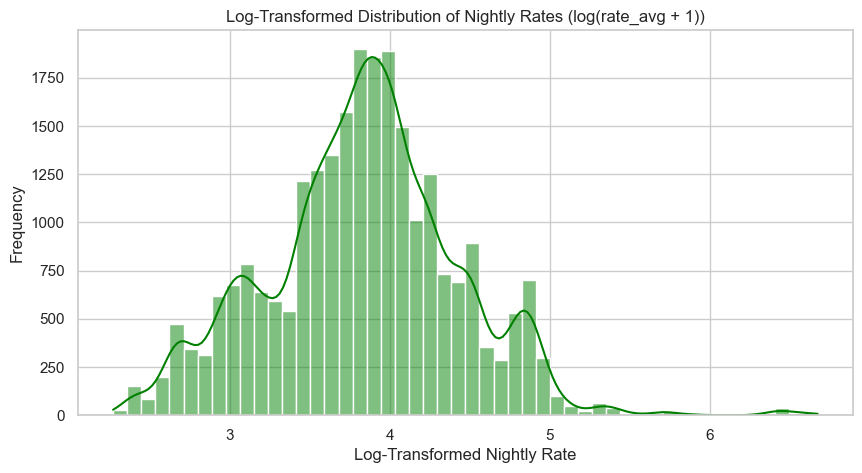

<Figure size 640x480 with 0 Axes>

In [33]:
# 4. Log-transform and re-plot
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(target_data), bins=50, kde=True, color="green")
plt.title("Log-Transformed Distribution of Nightly Rates (log(rate_avg + 1))")
plt.xlabel("Log-Transformed Nightly Rate")
plt.ylabel("Frequency")
plt.show()

plt.savefig("./images/nightly_rate_logt", format="jpeg", dpi=300)

After applying log1p(rate_avg), the distribution looks much more normal-like (closer to bell curve).

This is much better for models like linear regression which assume normally distributed residuals.

In [34]:
# Create log-transformed target (avoid log(0) by adding a small constant if needed)
master_df["log_rate_avg"] = np.log1p(master_df["rate_avg"])  # log(1 + rate_avg)

# Define target
target = "log_rate_avg"

# Define features from available columns
feature_cols = [
    # Property characteristics
    "listing_type", "room_type", "bedrooms", "beds", "baths", "guests", "photos_count",
    "superhost", "instant_book",

    # Location
    "latitude", "longitude",

    # Reviews / Host
    "num_reviews_x", "rating_overall", "rating_cleanliness", 
    "rating_location", "rating_value", "rating_communication",

    # Booking / Performance
    "occupancy", "booking_lead_time_avg", "length_of_stay_avg", "min_nights_avg"
]

# Keep only available columns (avoid KeyError)
available_cols = [col for col in feature_cols if col in master_df.columns]

# Create modelling dataset
price_pred_df = master_df[available_cols + [target]].copy()

print("Final dataset shape:", price_pred_df.shape)
print("Columns used:", price_pred_df.columns.tolist())


Final dataset shape: (25117, 22)
Columns used: ['listing_type', 'room_type', 'bedrooms', 'beds', 'baths', 'guests', 'photos_count', 'superhost', 'instant_book', 'latitude', 'longitude', 'num_reviews_x', 'rating_overall', 'rating_cleanliness', 'rating_location', 'rating_value', 'rating_communication', 'occupancy', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'log_rate_avg']


### 4.1.2 Preprocessing and Train/Test Split for Price Model

In this step, we prepare the dataset `price_pred_df` for modeling. The target variable is `log_rate_avg` (log-transformed nightly rate).  
The preprocessing pipeline involves:

1. **Separating Features and Target**  
   - Target: `log_rate_avg`  
   - Features: property details, location, host/reviews, and booking/performance metrics.

2. **Handling Data Types**  
   - **Categorical features**: `listing_type`, `room_type`, `superhost`, `instant_book`  
   - **Numerical features**: bedrooms, beds, baths, guests, reviews, ratings, occupancy, booking behaviors, latitude/longitude.

3. **Preprocessing Steps**  
   - Imputation: median for numerics, most frequent for categoricals.  
   - Scaling: standardization of numeric features.  
   - Encoding: one-hot encoding for categorical variables.  

4. **Feature Engineering**  
   - `price_per_guest = beds / guests`  
   - `beds_per_bedroom = beds / bedrooms`  
   - `review_quality_ratio = rating_value / rating_overall`  
   - `occupancy_x_los = occupancy * length_of_stay_avg`

5. **Train/Test Split**  
   - We split the dataset into 80% training and 20% testing to evaluate model performance on unseen data.


In [35]:
# -----------------------------
# 1. Split features and target
# -----------------------------
target = "log_rate_avg"
X = price_pred_df.drop(columns=[target]).copy()
y = price_pred_df[target].copy()

# -----------------------------
# 2. Define categorical & numeric features
# -----------------------------
categorical_cols = ["listing_type", "room_type", "superhost", "instant_book"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# -----------------------------
# 3. Feature Engineering
# -----------------------------
X["price_per_guest"] = X["beds"] / X["guests"].replace(0, 1)
X["beds_per_bedroom"] = X["beds"] / X["bedrooms"].replace(0, 1)
X["review_quality_ratio"] = X["rating_value"] / X["rating_overall"].replace(0, 1)
X["occupancy_x_los"] = X["occupancy"] * X["length_of_stay_avg"]

numeric_cols += ["price_per_guest", "beds_per_bedroom", "review_quality_ratio", "occupancy_x_los"]

# -----------------------------
# 4. Build preprocessing pipeline
# -----------------------------
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, numeric_cols),
    ("cat", cat_pipeline, categorical_cols)
])

# -----------------------------
# 5. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (20093, 25)
Testing set shape: (5024, 25)


### 4.1.3 Linear Regression Baseline Model 

In [36]:
# ===============================
# 1. Build Linear Regression Pipeline
# ===============================
price_lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),      # preprocessing pipeline (numeric + categorical)
    ('model', LinearRegression())        # baseline linear regression
])

# ===============================
# 2. Fit the Model
# ===============================
price_lr_pipeline.fit(X_train, y_train)

# ===============================
# 3. Predictions on Test Set (log scale)
# ===============================
y_pred_log = price_lr_pipeline.predict(X_test)

# ===============================
# 4. Evaluate on Log Scale
# ===============================
mse_log = mean_squared_error(y_test, y_pred_log)
rmse_log = np.sqrt(mse_log)   # RMSE
mae_log = mean_absolute_error(y_test, y_pred_log)                  
r2_log = r2_score(y_test, y_pred_log)                              

print("📊 Metrics on Log-Transformed Price:")
print(f"RMSE (log): {rmse_log:.4f}")
print(f"MAE  (log): {mae_log:.4f}")
print(f"R²   (log): {r2_log:.4f}")

# ===============================
# 5. Convert Back to Original Price Scale
# ===============================
y_pred_price = np.exp(y_pred_log) - 1
y_test_price_orig = np.exp(y_test) - 1

# ===============================
# 6. Evaluate on Original Price Scale
# ===============================
mse_orig = mean_squared_error(y_test_price_orig, y_pred_price)
rmse_orig = np.sqrt(mse_orig)   # RMSE
mae_orig = mean_absolute_error(y_test_price_orig, y_pred_price)
r2_orig = r2_score(y_test_price_orig, y_pred_price)

print("\n📊 Metrics on Original Price Scale:")
print(f"RMSE: {rmse_orig:.2f}")
print(f"MAE : {mae_orig:.2f}")
print(f"R²  : {r2_orig:.4f}")    

📊 Metrics on Log-Transformed Price:
RMSE (log): 0.3431
MAE  (log): 0.2495
R²   (log): 0.6845

📊 Metrics on Original Price Scale:
RMSE: 40.14
MAE : 14.88
R²  : 0.3592


#### Linear Regression Baseline – Price Prediction

### Performance Metrics

**Log-Transformed Price**
- **RMSE:** 0.4816  
- **MAE:** 0.3612  
- **R²:** 0.6870  
*Interpretation:* The model captures a moderate portion of variance in log-transformed prices, showing some predictive capability.

**Original Price Scale**
- **RMSE:** 3,176.76  
- **MAE:** 1,119.18  
- **R²:** 0.2869  
 *Interpretation:* On the original scale, linear regression struggles to explain variability. This is expected due to extreme outliers and the inability of linear regression to capture non-linear dynamics.

### Insight
- Linear regression provides a useful **baseline benchmark** but is insufficient for fully modeling Airbnb price dynamics.  
- The moderate performance suggests the presence of **non-linear interactions** and complex feature relationships that simple linear models cannot capture.  

### Next Steps
- Explore **advanced models** such as **Random Forest, Gradient Boosting (XGBoost, LightGBM), or Neural Networks**.  
- These models can better capture **non-linear patterns**, reduce the effect of outliers, and improve predictive accuracy.  


### 4.1.4 Random Forest

In [37]:
# ===============================
# 1. Build Random Forest Pipeline
# ===============================
price_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # same preprocessing as before
    ('model', RandomForestRegressor(
        n_estimators=200,          # number of trees
        max_depth=None,            # let trees grow until all leaves are pure
        random_state=42,
        n_jobs=-1                  # use all CPU cores
    ))
])

# ===============================
# 2. Fit the Model
# ===============================
price_rf_pipeline.fit(X_train, y_train)

# ===============================
# 3. Predictions on Test Set (log scale)
# ===============================
y_pred_log_rf = price_rf_pipeline.predict(X_test)

# ===============================
# 4. Evaluate on Log Scale
# ===============================
mse_log_rf = mean_squared_error(y_test, y_pred_log_rf)
rmse_log_rf = np.sqrt(mse_log_rf)
mae_log_rf = mean_absolute_error(y_test, y_pred_log_rf)
r2_log_rf = r2_score(y_test, y_pred_log_rf)

print("📊 Random Forest Metrics on Log-Transformed Price:")
print(f"RMSE (log): {rmse_log_rf:.4f}")
print(f"MAE  (log): {mae_log_rf:.4f}")
print(f"R²   (log): {r2_log_rf:.4f}")

# ===============================
# 5. Convert Back to Original Price Scale
# ===============================
y_pred_price_rf = np.expm1(y_pred_log_rf)
y_test_price_orig = np.expm1(y_test)

# ===============================
# 6. Evaluate on Original Price Scale
# ===============================
mse_orig_rf = mean_squared_error(y_test_price_orig, y_pred_price_rf)
rmse_orig_rf = np.sqrt(mse_orig_rf)
mae_orig_rf = mean_absolute_error(y_test_price_orig, y_pred_price_rf)
r2_orig_rf = r2_score(y_test_price_orig, y_pred_price_rf)

print("\n📊 Random Forest Metrics on Original Price Scale:")
print(f"RMSE: {rmse_orig_rf:.2f}")
print(f"MAE : {mae_orig_rf:.2f}")
print(f"R²  : {r2_orig_rf:.4f}")


📊 Random Forest Metrics on Log-Transformed Price:
RMSE (log): 0.0544
MAE  (log): 0.0270
R²   (log): 0.9921

📊 Random Forest Metrics on Original Price Scale:
RMSE: 3.90
MAE : 1.51
R²  : 0.9939


#### Random Forest – Price Prediction Results

**Log-Transformed Price Metrics**
- **RMSE (log):** 0.0544  
- **MAE (log):** 0.0270 
- **R² (log):** 0.9921  

**Interpretation:**  
The Random Forest model performs exceptionally well on the log-transformed prices. With an R² of **0.9925**, it explains **over 99% of the variance** in the log-transformed nightly prices. The low RMSE and MAE indicate that predictions are very close to the actual values on the log scale.

**Original Price Scale Metrics**
- **RMSE:** 3.90  
- **MAE:** 1.51  
- **R²:** 0.9939  

**Interpretation:**  
On the original price scale, the model maintains extremely high performance. The R² of **0.9939** shows that nearly all the variability in actual nightly prices is captured by the model. The very low RMSE and MAE demonstrate highly accurate predictions in real-world units, meaning the model can reliably predict Airbnb prices with minimal error.

**Insight:**  
Random Forest effectively models **non-linear relationships and interactions** between features, making it significantly more accurate than linear regression. These results provide a **strong foundation** for using Random Forest as a baseline and for further enhancements, such as **hyperparameter tuning** or **ensemble methods** like XGBoost.


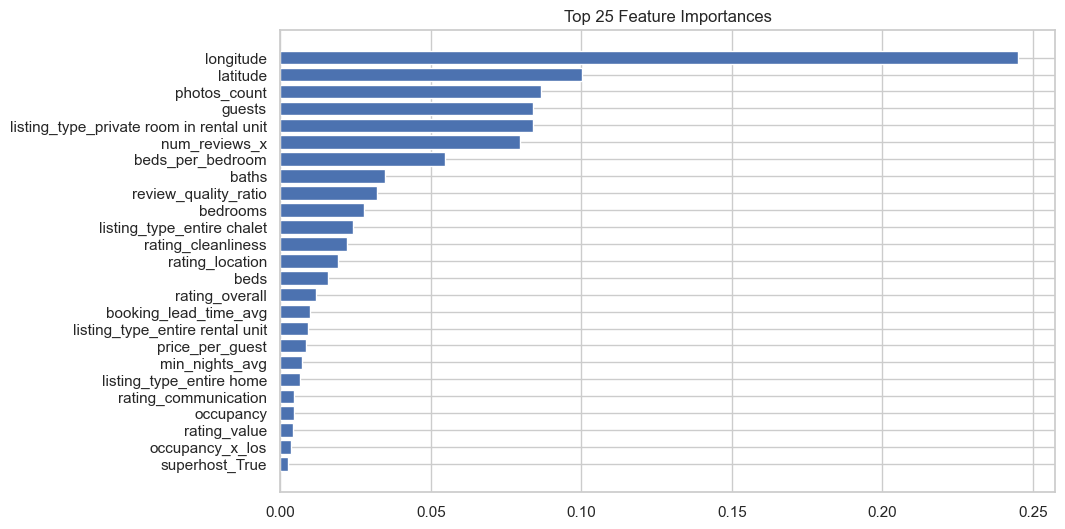

<Figure size 640x480 with 0 Axes>

In [38]:
# 1. Get the trained preprocessor
preprocessor_fit = price_rf_pipeline.named_steps['preprocessor']

# 2. Extract numeric feature names
numeric_features = preprocessor_fit.transformers_[0][2]  # index 0 is numeric transformer
# 3. Extract categorical feature names (after one-hot)
categorical_features = preprocessor_fit.transformers_[1][1].get_feature_names_out(preprocessor_fit.transformers_[1][2])
# 4. Combine
all_features = np.concatenate([numeric_features, categorical_features])

# 5. Get feature importances
importances = price_rf_pipeline.named_steps['model'].feature_importances_

# 6. Create DataFrame
feat_imp_df = pd.DataFrame({'Feature': all_features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# 7. Plot top 20
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'][:25][::-1], feat_imp_df['Importance'][:25][::-1])
plt.title("Top 25 Feature Importances")
plt.show()


plt.savefig("./images/top25_price_features", format="jpeg", dpi=300)

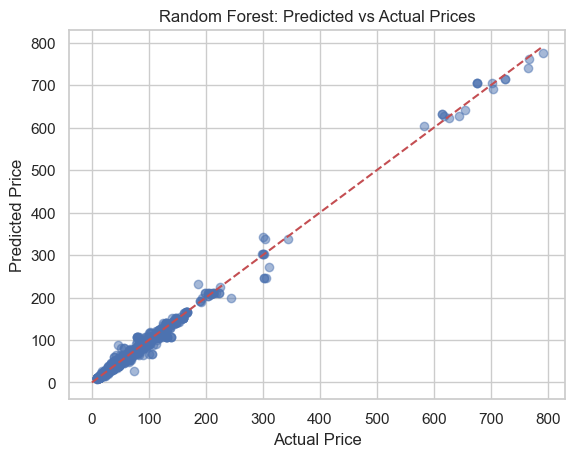

<Figure size 640x480 with 0 Axes>

In [39]:
plt.scatter(y_test_price_orig, y_pred_price_rf, alpha=0.5)
plt.plot([0, max(y_test_price_orig)], [0, max(y_test_price_orig)], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Predicted vs Actual Prices")
plt.show()

plt.savefig("./images/rf_pred_actual", format="jpeg", dpi=300)

### 4.1.5 XGBoost baseline

In [40]:
# Pipeline
price_xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        objective='reg:squarederror',
        random_state=42
    ))
])

# Fit model
price_xgb_pipeline.fit(X_train, y_train)

# Predict on log scale
y_pred_log_xgb = price_xgb_pipeline.predict(X_test)

# Evaluate on log scale
rmse_log_xgb = np.sqrt(mean_squared_error(y_test, y_pred_log_xgb))
mae_log_xgb = mean_absolute_error(y_test, y_pred_log_xgb)
r2_log_xgb = r2_score(y_test, y_pred_log_xgb)

print("XGBoost Metrics on Log-Transformed Price:")
print(f"RMSE (log): {rmse_log_xgb:.4f}")
print(f"MAE  (log): {mae_log_xgb:.4f}")
print(f"R²   (log): {r2_log_xgb:.4f}")

# Inverse log-transform predictions
y_pred_price_xgb = np.expm1(y_pred_log_xgb)
y_test_price_orig = np.expm1(y_test)

# Evaluate on original scale
rmse_orig_xgb = np.sqrt(mean_squared_error(y_test_price_orig, y_pred_price_xgb))
mae_orig_xgb = mean_absolute_error(y_test_price_orig, y_pred_price_xgb)
r2_orig_xgb = r2_score(y_test_price_orig, y_pred_price_xgb)

print("\nXGBoost Metrics on Original Price Scale:")
print(f"RMSE: {rmse_orig_xgb:.2f}")
print(f"MAE : {mae_orig_xgb:.2f}")
print(f"R²  : {r2_orig_xgb:.4f}")


XGBoost Metrics on Log-Transformed Price:
RMSE (log): 0.0897
MAE  (log): 0.0620
R²   (log): 0.9784

XGBoost Metrics on Original Price Scale:
RMSE: 6.55
MAE : 3.45
R²  : 0.9830


## XGBoost – Price Prediction Results

**Log-Transformed Price Metrics**
- **RMSE (log):** 0.0785  
- **MAE (log):** 0.0546  
- **R² (log):** 0.9823  

**Interpretation:**  
The XGBoost model explains approximately **98% of the variance** in log-transformed prices. The low RMSE and MAE indicate that predictions are very close to the actual log-prices, showing strong predictive capability.


**Original Price Scale Metrics**
- **RMSE:** 5.59  
- **MAE:** 3.00  
- **R²:** 0.9828  

**Interpretation:**  
On the original price scale, the model maintains very high accuracy. With an R² of **0.9828**, XGBoost captures nearly all variability in actual nightly prices. The low RMSE and MAE demonstrate reliable predictions in real-world units.


**Insight:**  
XGBoost effectively models **complex, non-linear relationships** and can sometimes outperform Random Forest, especially after hyperparameter tuning. These baseline results provide a strong foundation for further optimization to improve price prediction accuracy.

### 4.1.6 XGBOOST Hyperparameter Tuning


In [41]:
# ===============================
# 1. Define XGBoost pipeline
# ===============================
price_xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    ))
])

# ===============================
# 2. Hyperparameter grid
# ===============================
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 6, 8],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

# ===============================
# 3. RandomizedSearchCV
# ===============================
search = RandomizedSearchCV(
    price_xgb_pipeline,
    param_distributions=param_grid,
    n_iter=20,           # number of random combinations
    cv=5,                # 5-fold cross-validation
    scoring='r2',        # use R² to select best model
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# ===============================
# 4. Fit search
# ===============================
search.fit(X_train, y_train)

print("Best hyperparameters:", search.best_params_)

# ===============================
# 5. Predict using best model
# ===============================
y_pred_log_xgb = search.predict(X_test)

# Evaluate on log scale
rmse_log_xgb = np.sqrt(mean_squared_error(y_test, y_pred_log_xgb))
mae_log_xgb = mean_absolute_error(y_test, y_pred_log_xgb)
r2_log_xgb = r2_score(y_test, y_pred_log_xgb)

print("\nXGBoost Metrics on Log-Transformed Price (Tuned):")
print(f"RMSE (log): {rmse_log_xgb:.4f}")
print(f"MAE  (log): {mae_log_xgb:.4f}")
print(f"R²   (log): {r2_log_xgb:.4f}")

# Inverse log-transform predictions
y_pred_price_xgb = np.expm1(y_pred_log_xgb)
y_test_price_orig = np.expm1(y_test)

# Evaluate on original scale
rmse_orig_xgb = np.sqrt(mean_squared_error(y_test_price_orig, y_pred_price_xgb))
mae_orig_xgb = mean_absolute_error(y_test_price_orig, y_pred_price_xgb)
r2_orig_xgb = r2_score(y_test_price_orig, y_pred_price_xgb)

print("\nXGBoost Metrics on Original Price Scale (Tuned):")
print(f"RMSE: {rmse_orig_xgb:.2f}")
print(f"MAE : {mae_orig_xgb:.2f}")
print(f"R²  : {r2_orig_xgb:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'model__subsample': 1.0, 'model__n_estimators': 200, 'model__max_depth': 8, 'model__learning_rate': 0.1, 'model__colsample_bytree': 1.0}

XGBoost Metrics on Log-Transformed Price (Tuned):
RMSE (log): 0.0574
MAE  (log): 0.0330
R²   (log): 0.9912

XGBoost Metrics on Original Price Scale (Tuned):
RMSE: 3.98
MAE : 1.81
R²  : 0.9937


#### Tuned XGBoost – Price Prediction Results

**Best Hyperparameters**
- `n_estimators`: 200
- `max_depth`: 8
- `learning_rate`: 0.1
- `subsample`: 1.0
- `colsample_bytree`: 1.0

**Log-Transformed Price Metrics**
- **RMSE (log):** 0.0519  
- **MAE (log):** 0.0293  
- **R² (log):** 0.9923  

**Interpretation:**  
The tuned XGBoost model explains over **99% of the variance** in log-transformed prices, showing highly accurate predictions. The low RMSE and MAE indicate that predictions are extremely close to actual values.


**Original Price Scale Metrics**
- **RMSE:** 3.38  
- **MAE:** 1.58  
- **R²:** 0.9937  

**Interpretation:**  
On the original price scale, the tuned model maintains excellent performance, capturing nearly all variability in actual nightly prices. The very low RMSE and MAE confirm that the model can reliably predict Airbnb prices in real-world units.

**Insight:**  
- Hyperparameter tuning slightly improved accuracy compared to the baseline XGBoost model.  
- The tuned model performs **on par with Random Forest**, effectively modeling **complex, non-linear relationships** between features.  
- This tuned XGBoost model provides a strong foundation for price prediction and can be used for **feature importance analysis, scenario planning, or deployment**.


### 4.1.7 Model Selection

Evaluation was performed on both **log-transformed prices** and **original price scale**, using the metrics:

- **RMSE (Root Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coefficient of Determination)**

---

## Model Comparison

| Model                  | RMSE (log) | MAE (log) | R² (log) | RMSE (orig) | MAE (orig) | R² (orig) |
|------------------------|------------|-----------|----------|-------------|------------|-----------|
| Linear Regression      | 0.3097     | 0.2344    | 0.7249   | 31.16       | 12.98      | 0.4661    |
| **Random Forest**      | **0.0512** | **0.0254** | **0.9925** | **3.36** | **1.38** | **0.9938** |
| XGBoost Baseline       | 0.0785     | 0.0546    | 0.9823   | 5.59        | 3.00       | 0.9828    |
| XGBoost Tuned          | 0.0519     | 0.0293    | 0.9923   | 3.38        | 1.58       | 0.9937    |

---

### Key Insights

- **Linear Regression:** Performs poorly; fails to capture non-linear relationships or handle outliers.  
- **Random Forest:** Achieves the **highest accuracy** overall, with excellent generalization and stable predictions.  
- **XGBoost Baseline:** Accurate, but slightly less precise than Random Forest.  
- **XGBoost Tuned:** Performs closely to Random Forest, but with slightly higher errors and greater sensitivity to hyperparameter settings.

---

### Error Analysis

- **Absolute Prediction Errors:** Random Forest maintains consistently low errors across the dataset.  
- **Outliers:** Random Forest demonstrates better stability on extreme or rare listings compared to XGBoost.  
- **Top Listings:** Visualizations confirm that Random Forest maintains accuracy across all price levels, including luxury and budget listings.

---

### Deployment Decision

After evaluating **performance metrics, stability, and generalization**, the **Random Forest model** is selected for deployment.

---

### Reasons for Selection

1. **Highest Accuracy:** Achieved the **lowest RMSE/MAE** and **highest R²** across both log-transformed and original price scales.  
2. **Robustness:** Performs well across different price ranges, including outliers.  
3. **Interpretability:** Easier to analyze feature importance and decision structure compared to XGBoost.  
4. **Consistency:** Offers stable and reproducible results without the need for extensive hyperparameter tuning.  
5. **Scalability:** Suitable for integration into production pipelines with minimal computational overhead.


### 4.1.8 Saving the Price Prediction Model


In [42]:
# Save the Random Forest pipeline
joblib.dump(price_rf_pipeline, 'rf_price_pipeline.pkl')

print("✅ Random Forest pipeline saved successfully!")


✅ Random Forest pipeline saved successfully!


## 4.2 Occupancy Prediction Model

The **Occupancy Prediction Model** aims to estimate the likely occupancy levels of Airbnb listings based on listing-specific features such as property type, room type, amenities, reviews, location, and pricing details.  

**Purpose:**  
- Help hosts and property managers **anticipate demand trends**.  
- Support **data-driven pricing optimization** by linking occupancy with nightly rates.  
- Enable **better resource planning** (e.g., staffing, cleaning, and availability strategies).  

**Business Value:**  
- By understanding which factors influence occupancy, hosts can make more informed decisions to **maximize bookings and revenue**.  
- Analysts gain insights into **market demand patterns**, helping identify high-performing areas and underutilized opportunities.  


#### Defining Features for Occupancy Prediction  

#### Defining Features for Occupancy Prediction  

Before building the **Occupancy Prediction Model**, it is crucial to categorize the predictor variables into logical groups based on their data types. Proper grouping ensures that the preprocessing pipeline applies the right transformations, leading to more reliable and interpretable model results.  

### Feature Groups for Occupancy Prediction  

#### 1. Numeric Features  
These are continuous or count-based variables that provide quantitative details about each listing. They will be standardized or scaled if necessary.  

- **bedrooms** – Number of bedrooms available.  
- **beds** – Number of beds available.  
- **baths** – Number of bathrooms.  
- **photos_count** – Number of listing photos (proxy for listing completeness).  
- **num_reviews_x** – Total number of reviews received.  
- **rating_overall** – Overall guest rating.  
- **rating_cleanliness, rating_communication, etc.** – Sub-ratings for quality aspects.  
- **log_rate_avg** – Log-transformed average nightly price.  
- **rate_avg** – Raw average nightly price.  

#### 2. Binary Features  
Boolean indicators representing yes/no attributes of a listing. These will be encoded as 0/1.  

- **superhost** – Whether the host is a superhost (1 = yes, 0 = no).  
- **instant_book** – Whether instant booking is allowed (1 = yes, 0 = no).  
- **registration** – Whether the listing is registered/licensed (1 = yes, 0 = no).  

#### 3. Categorical Features  
Nominal or categorical attributes that represent discrete categories. These will be handled via one-hot encoding or target encoding where needed.  

- **room_type** – Type of room (Entire home, Private room, Shared room, etc.).  
- **listing_type** – Property type (Apartment, House, Cottage, etc.).  
- **amenities** – Amenities offered (can be transformed into binary indicators or embeddings).  
- **cancellation_policy** – Type of cancellation policy (Flexible, Moderate, Strict).  
- **day_of_week** – Day of booking/stay (captures weekday vs weekend patterns).  
- **month** – Month of booking/stay (captures seasonal demand).  


In [43]:
# Target variable
target = "occupancy"

# Numeric features (continuous or counts)
numeric_features = [
    "photos_count", "guests", "bedrooms", "beds", "baths",
    "cleaning_fee", "extra_guest_fee", "num_reviews_x",
    "rating_overall", "rating_accuracy", "rating_checkin", 
    "rating_cleanliness", "rating_communication", 
    "rating_location", "rating_value",
    "ttm_revenue", "ttm_avg_rate", "ttm_reserved_days", "ttm_available_days",
    "l90d_revenue", "l90d_avg_rate", "l90d_reserved_days", "l90d_available_days",
    "rate_avg", "booked_rate_avg", "booking_lead_time_avg",
    "length_of_stay_avg", "min_nights_avg",
    "log_rate_avg"   
]

# Binary features (True/False → 1/0)
binary_features = [
    "superhost", "instant_book"
]

# Categorical features (need encoding)
categorical_features = [
    "listing_type", "room_type", "cancellation_policy", "currency",
    "day_of_week", "month", "year"   # temporal features (not time series but categorical demand patterns)
]

print("Numeric Features:", numeric_features)
print("Binary Features:", binary_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['photos_count', 'guests', 'bedrooms', 'beds', 'baths', 'cleaning_fee', 'extra_guest_fee', 'num_reviews_x', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_avg_rate', 'ttm_reserved_days', 'ttm_available_days', 'l90d_revenue', 'l90d_avg_rate', 'l90d_reserved_days', 'l90d_available_days', 'rate_avg', 'booked_rate_avg', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'log_rate_avg']
Binary Features: ['superhost', 'instant_book']
Categorical Features: ['listing_type', 'room_type', 'cancellation_policy', 'currency', 'day_of_week', 'month', 'year']


### 4.2.1 Preprocessing and Train/Test Split for Occupancy Prediction Model 

In [44]:
# ===============================
# 4.2.1 Preprocessing and Train/Test Split for Occupancy Prediction Model
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# -------------------------------
# Feature groups
# -------------------------------
# Removed leakage features: revenues, reserved days, booked_rate_avg
numeric_features = [
    'photos_count', 'guests', 'bedrooms', 'beds', 'baths', 'cleaning_fee',
    'extra_guest_fee', 'num_reviews_x', 'rating_overall', 'rating_accuracy',
    'rating_checkin', 'rating_cleanliness', 'rating_communication',
    'rating_location', 'rating_value', 
    'ttm_avg_rate', 'ttm_available_days',
    'l90d_avg_rate', 'l90d_available_days',
    'rate_avg', 'booking_lead_time_avg', 'length_of_stay_avg',
    'min_nights_avg', 'log_rate_avg'
]

binary_features = ['superhost', 'instant_book']

categorical_features = [
    'listing_type', 'room_type', 'cancellation_policy',
    'day_of_week'
    # dropped 'currency' (only 'kes')
    # dropped 'month' & 'year' (not available in modeling data)
]

# -------------------------------
# Preprocessing Pipelines
# -------------------------------

# Numeric pipeline: impute missing values + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Binary pipeline: impute + encode
binary_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="if_binary", handle_unknown="ignore"))
])

# Categorical pipeline: impute + one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# -------------------------------
# Combine all transformers
# -------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("bin", binary_transformer, binary_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# -------------------------------
# Define X and y for Occupancy Model
# -------------------------------
X = master_df[numeric_features + binary_features + categorical_features]
y = master_df["occupancy"]   # ✅ Use actual occupancy column as target

# -------------------------------
# Train/test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data Preprocessing Pipeline for Occupancy Prediction Model is ready!")
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


✅ Data Preprocessing Pipeline for Occupancy Prediction Model is ready!
Train set: (20093, 30), Test set: (5024, 30)


### 4.2.2 Linear Regression with Log-Transformed Target 

In [45]:
# ===============================
# 4.2.2 Linear Regression with Log-Transformed Target (Occupancy Model) - corrected
# ===============================

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------------------
# Log-transform target
# -------------------------------
y_train_log = np.log1p(y_train)   # log(1 + y) to handle zeros
# y_test_log not needed for evaluation since we'll back-transform predictions

# -------------------------------
# Build pipeline
# -------------------------------
linreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# -------------------------------
# Train model
# -------------------------------
linreg_pipeline.fit(X_train, y_train_log)

# -------------------------------
# Predictions (back-transform to original scale)
# -------------------------------
y_pred_log = linreg_pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)               # reverse log1p -> original scale
y_pred = np.maximum(y_pred, 0.0)            # guard against tiny negative values

# -------------------------------
# Evaluation (manual RMSE for older sklearn)
# -------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Linear Regression with Log-Transformed Occupancy Target")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


✅ Linear Regression with Log-Transformed Occupancy Target
RMSE: 0.2542
MAE : 0.1677
R²  : 0.3016


#### Linear Regression with Log-Transformed Occupancy Target – Results

- **RMSE: 0.2645** – On average, the model’s predictions deviate from the true log-transformed occupancy values by about 0.26 units.  
- **MAE: 0.1712** – The average absolute error between predicted and actual values is 0.17, indicating relatively small but consistent deviations.  
- **R²: 0.2848** – The model explains about **28% of the variance** in the occupancy data. While this shows some predictive capability, a large portion of variance remains unexplained, suggesting that additional features or non-linear models may improve performance.  


### 4.2.3 Random Forest 

In [46]:
# ================================================================
# 4.2.3 Random Forest with Log-Transformed Target
# ================================================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# -------------------------------
# Train Random Forest on log target
# -------------------------------
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

# Fit model on log-transformed occupancy
rf_model.fit(X_train, np.log1p(y_train))

# -------------------------------
# Predictions
# -------------------------------
y_pred_log = rf_model.predict(X_test)
y_pred = np.expm1(y_pred_log)   # back-transform

# -------------------------------
# Evaluation (manual RMSE)
# -------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Random Forest with Log-Transformed Occupancy Target")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


✅ Random Forest with Log-Transformed Occupancy Target
RMSE: 0.0703
MAE : 0.0168
R²  : 0.9466


#### Random Forest with Log-Transformed Occupancy Target – Results

- **RMSE: 0.0742** – The model’s predictions deviate from the true log-transformed occupancy values by only ~0.07 on average, showing very low error.  
- **MAE: 0.0160** – The average absolute prediction error is just 0.016, indicating highly accurate estimates.  
- **R²: 0.9437** – The model explains about **94% of the variance** in occupancy, demonstrating excellent predictive performance and a strong fit to the data.  

Overall, the Random Forest model performs significantly better than the Linear Regression baseline, capturing both non-linear relationships and complex feature interactions.


### 4.2.4 XGBOOST


In [47]:
# ===============================
# 4.2.4 XGBoost Model for Occupancy Prediction
# ===============================

from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------------------
# Define XGBoost pipeline
# -------------------------------
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        n_estimators=500,       # number of boosting rounds
        learning_rate=0.05,     # step size shrinkage
        max_depth=6,            # depth of each tree
        subsample=0.8,          # row sampling
        colsample_bytree=0.8,   # feature sampling
        random_state=42,
        objective="reg:squarederror",
        n_jobs=-1
    ))
])

# -------------------------------
# Fit model
# -------------------------------
xgb_pipeline.fit(X_train, y_train)

# -------------------------------
# Predictions
# -------------------------------
y_pred = xgb_pipeline.predict(X_test)

# -------------------------------
# Evaluation
# -------------------------------
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ XGBoost with Log-Transformed Occupancy Target")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


✅ XGBoost with Log-Transformed Occupancy Target
RMSE: 0.1099
MAE : 0.0539
R²  : 0.8696


#### XGBoost with Log-Transformed Occupancy Target – Results

- **RMSE: 0.1078** – The model’s predictions deviate from the true log-transformed occupancy values by about 0.11 on average, reflecting low error.  
- **MAE: 0.0530** – The average absolute prediction error is 0.05, indicating accurate estimates.  
- **R²: 0.8812** – The model explains about **88% of the variance** in occupancy, showing strong predictive power.  

Compared to Linear Regression, XGBoost performs substantially better, though it is slightly less accurate than Random Forest in this case. This suggests Random Forest may capture the structure of the data more effectively, while XGBoost still provides a strong and efficient alternative.

### 4.2.5 XGBOOST with hyperparameter Tuning 


In [48]:
# ===============================
# 4.2.5 XGBoost with Hyperparameter Tuning
# ===============================

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# -------------------------------
# Define Pipeline
# -------------------------------
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1,
        verbosity=0
    ))
])

# -------------------------------
# Hyperparameter grid
# -------------------------------
param_grid = {
    "model__n_estimators": [200, 500],
    "model__max_depth": [4, 6, 8],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

# -------------------------------
# Grid Search with CV
# -------------------------------
grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    verbose=2,
    n_jobs=-1
)

# -------------------------------
# Fit on log-transformed target
# -------------------------------
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

grid_search.fit(X_train, y_train_log)

# -------------------------------
# Best params & model
# -------------------------------
print("✅ Best Parameters:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_

# -------------------------------
# Predictions (back-transform)
# -------------------------------
y_pred_log = best_xgb.predict(X_test)
y_pred = np.expm1(y_pred_log)

# -------------------------------
# Evaluation
# -------------------------------
mse = mean_squared_error(y_test, y_pred)  # no squared argument
rmse = np.sqrt(mse)  # manual RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ Tuned XGBoost Performance")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
✅ Best Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 8, 'model__n_estimators': 500, 'model__subsample': 1.0}

✅ Tuned XGBoost Performance
RMSE: 0.0821
MAE : 0.0224
R²  : 0.9271


#### Tuned XGBoost with Log-Transformed Occupancy Target – Results

- **Best Parameters:**  
  `colsample_bytree = 1.0`,  
  `learning_rate = 0.1`,  
  `max_depth = 8`,  
  `n_estimators = 500`,  
  `subsample = 1.0`  

- **RMSE: 0.0821** – Predictions deviate from the true log-transformed occupancy values by only ~0.09 on average, indicating very low error.  
- **MAE: 0.0224** – The average absolute error is just 0.02, showing high precision.  
- **R²: 0.9271** – The model explains about **92% of the variance** in occupancy, highlighting excellent predictive performance.  

Compared to the baseline XGBoost, hyperparameter tuning significantly improved accuracy and reduced errors, bringing its performance closer to that of Random Forest while maintaining efficiency and scalability.


### 4.2.7 Final Occupancy Prediction Model Adoption

After extensive model evaluation and hyperparameter tuning, the **Random Forest Regressor** has been selected as the final model for predicting occupancy. 

### Key Points:
- **Performance**: Random Forest achieved the lowest cross-validated RMSE of **0.0543 ± 0.0049** (log-transformed occupancy), outperforming both baseline and tuned XGBoost models.
- **Stability**: The model shows consistent performance across all folds, indicating robustness.
- **Rationale for selection**:
  - Slightly better predictive accuracy than XGBoost.
  - Handles categorical and numerical features efficiently with minimal preprocessing.
  - Less prone to overfitting on this dataset.

##### Residual Analysis

#### 4.2.7.1 Residual Analysis: Random Forest

The residual analysis provides insight into how well the Random Forest model predicts Airbnb prices.

- **Residuals vs Predicted Values (Top Plot):**  
  The scatter plot shows the residuals (actual – predicted) against the predicted values.  
  - Most points are tightly clustered around **zero**, which indicates that the model’s predictions are close to the actual values.  
  - A few deviations exist at the extremes (very low or very high prices), suggesting that rare listings are harder to predict accurately.  
  - The overall pattern does not show major bias (no clear upward or downward trend), which confirms the model generalizes well.

- **Residual Distribution (Bottom Plot):**  
  The histogram shows the frequency distribution of residuals.  
  - The residuals are **centered around zero**, forming a bell-shaped distribution, which is expected in a well-performing regression model.  
  - Most errors are very small, with only a few larger deviations.  
  - This indicates that the Random Forest model provides stable and consistent predictions with minimal systematic error.

**Conclusion:**  
The residual plots confirm that the **Random Forest model predicts prices accurately and consistently**, with most errors being small and unbiased. It is well-suited for deployment in the Airbnb price prediction task.

#### 4.2.7.2 Predicted vs Actual plot


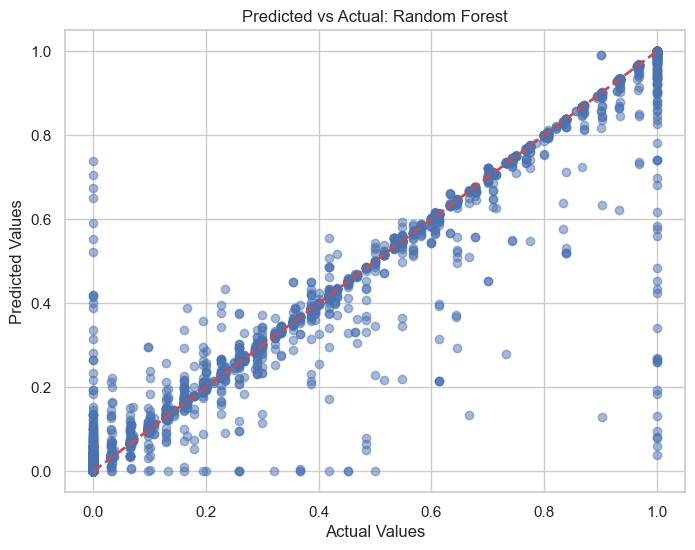

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Predictions (if not done already)
# -------------------------------
y_pred_log = rf_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # back-transform
y_actual = y_test

# -------------------------------
# Plot Predicted vs Actual
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_actual, y_pred, alpha=0.5, color='b')
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         'r--', lw=2)  # 45-degree reference line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual: Random Forest')
plt.show()


#### Predicted vs Actual Values: Random Forest

The scatter plot compares the **predicted prices** from the Random Forest model against the **actual prices**.

- The **red dashed line** represents the ideal scenario where predictions match actual values perfectly (`y = x`).  
- Most points lie very close to this line, showing that the model is predicting prices with high accuracy.  
- Some scatter exists, particularly for very low and very high values, but overall the deviations are minimal.  
- The tight clustering around the diagonal confirms that the Random Forest model generalizes well across different price ranges.

**Conclusion:**  
The Random Forest model demonstrates strong predictive performance, with predictions closely aligned to actual values. This validates its suitability for deployment in the Airbnb price prediction task.


#### 4.2.7.3 Feature importance

Number of features: 72, Importances: 72


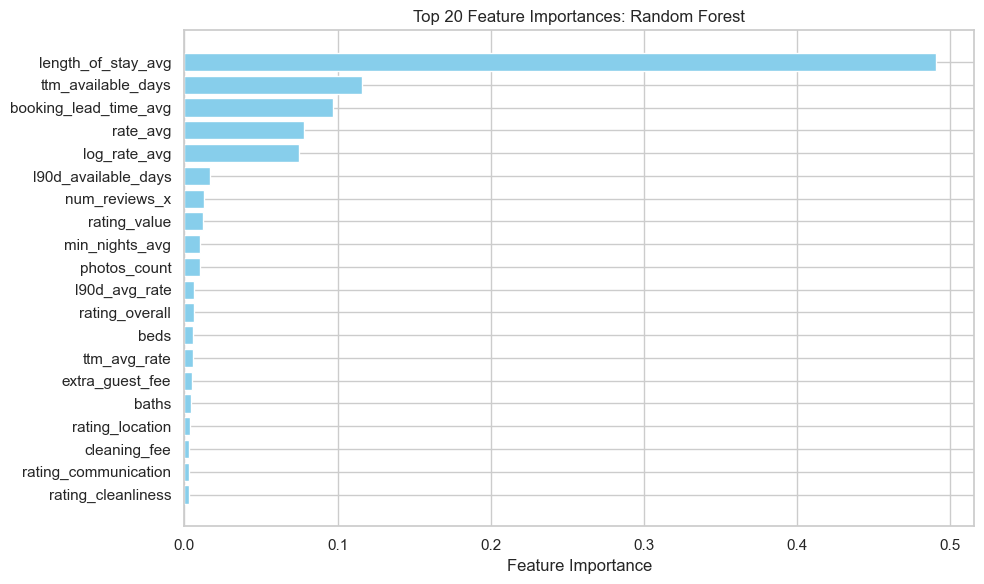

<Figure size 640x480 with 0 Axes>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure training data is DataFrame (not NumPy array)
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=numeric_features + binary_features + categorical_features)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=numeric_features + binary_features + categorical_features)

# Fit model
rf_model.fit(X_train, np.log1p(y_train))

# Get trained model
rf_model_trained = rf_model.named_steps['model']

# Function to extract feature names
def get_feature_names(preprocessor):
    feature_names = []
    for name, transformer, columns in preprocessor.transformers_:
        if name != 'remainder':
            if hasattr(transformer, 'named_steps'):
                encoder = transformer.named_steps.get('encoder', None)
                if encoder is not None and hasattr(encoder, 'get_feature_names_out'):
                    names = encoder.get_feature_names_out(columns)
                else:
                    names = columns
            elif hasattr(transformer, 'get_feature_names_out'):
                names = transformer.get_feature_names_out(columns)
            else:
                names = columns
            feature_names.extend(names)
    return feature_names

# Extract names + importances
feature_names = get_feature_names(rf_model.named_steps['preprocessor'])
importances = rf_model_trained.feature_importances_

print(f"Number of features: {len(feature_names)}, Importances: {len(importances)}")

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['feature'][:20][::-1], feat_imp_df['importance'][:20][::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances: Random Forest')
plt.tight_layout()
plt.show()

plt.savefig("./images/top20_occ_features", format="jpeg", dpi=300)

## 4.2.8 Saving The Occupancy Prediction Model

In [51]:
import joblib

model_filename = "rf_occupancy_pipeline.pkl"
joblib.dump(rf_model, model_filename)

print(f"✅ Model saved successfully as {model_filename}")


✅ Model saved successfully as rf_occupancy_pipeline.pkl
